In [6]:
%matplotlib inline
import sys
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [7]:
import community_detection

Analysis of SST field with Infomap + causality.

We consider the SST field in the CM4 Climate model. 

Length T: 300 years.

Temporal resolution: 1 month

Grid resolution: $1^\circ$ (regular grid)

# Community detection

### No Heuristic

In [ ]:
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/Causality_work/model/dimensionality_reduction/Data/SST/Global/model_300years/highpass/tos_300yrs_1deg_nohl_a_monthly_anomalies_new_land0_filter10yr.nc'

climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'
rand_sample_k = 1000000
rand_sample_eta = 1000000
q_k = 0.95
q_eta = 1 # ---> no heuristic

import time

start = time.time()

community_map, single_communities, average_signals, cumulative_signals = community_detection.community_detection(path,climate_variable,lon_variable,lat_variable,
                                                                                                                 rand_sample_k,rand_sample_eta,q_k,q_eta)
end = time.time()

print('Finished in '+str(round(end - start, 2))+' seconds')

In [ ]:
plt.imshow(community_map)

In [ ]:
np.save('./results/community_map_infomap_no_H.npy',community_map)
np.save('./results/single_communities_infomap_no_H.npy',single_communities)
np.save('./results/average_signals_infomap_no_H.npy',average_signals)

### Heuristic

In [ ]:
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/Causality_work/model/dimensionality_reduction/Data/SST/Global/model_300years/highpass/tos_300yrs_1deg_nohl_a_monthly_anomalies_new_land0_filter10yr.nc'

climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'
rand_sample_k = 1000000
rand_sample_eta = 1000000
q_k = 0.95
q_eta = 0.15 

import time

start = time.time()

community_map, single_communities, average_signals, cumulative_signals = community_detection.community_detection(path,climate_variable,lon_variable,lat_variable,
                                                                                                                rand_sample_k,rand_sample_eta,q_k,q_eta)
end = time.time()

print('Finished in '+str(round(end - start, 2))+' seconds')

In [ ]:
plt.imshow(community_map)

In [ ]:
np.save('./results/community_map_infomap_H.npy',community_map)
np.save('./results/single_communities_infomap_H.npy',single_communities)
np.save('./results/average_signals_infomap_H.npy',average_signals)
#np.save('../results/sst/tropical_pacific/original/q_0p95/cumulative_signals_louvain.npy',cumulative_signals)

# Analyze piControl Communities

In [8]:
# Load longitudes and latitudes
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/Causality_work/model/dimensionality_reduction/Data/SST/Global/model_300years/highpass/tos_300yrs_1deg_nohl_a_monthly_anomalies_new_land0_filter10yr.nc'
climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'

import utils

data = utils.load_data(path,climate_variable)
data = utils.masked_array_to_numpy(data)

latitudes = utils.load_data(path,lat_variable)
latitudes = utils.masked_array_to_numpy(latitudes)

longitudes = utils.load_data(path,lon_variable)
longitudes = utils.masked_array_to_numpy(longitudes)

In [9]:
data.shape

(3612, 120, 360)

In [10]:
import utils
import preprocessing

## Communities

In [11]:
community_map_noH = np.load('./results/community_map_infomap_no_H.npy')
single_communities_noH = np.load('./results/single_communities_infomap_no_H.npy')
average_signals_noH = np.load('./results/average_signals_infomap_no_H.npy')

community_map_H = np.load('./results/community_map_infomap_H.npy')
single_communities_H = np.load('./results/single_communities_infomap_H.npy')
average_signals_H = np.load('./results/average_signals_infomap_H.npy')

In [12]:
community_map_H.shape

(120, 360)

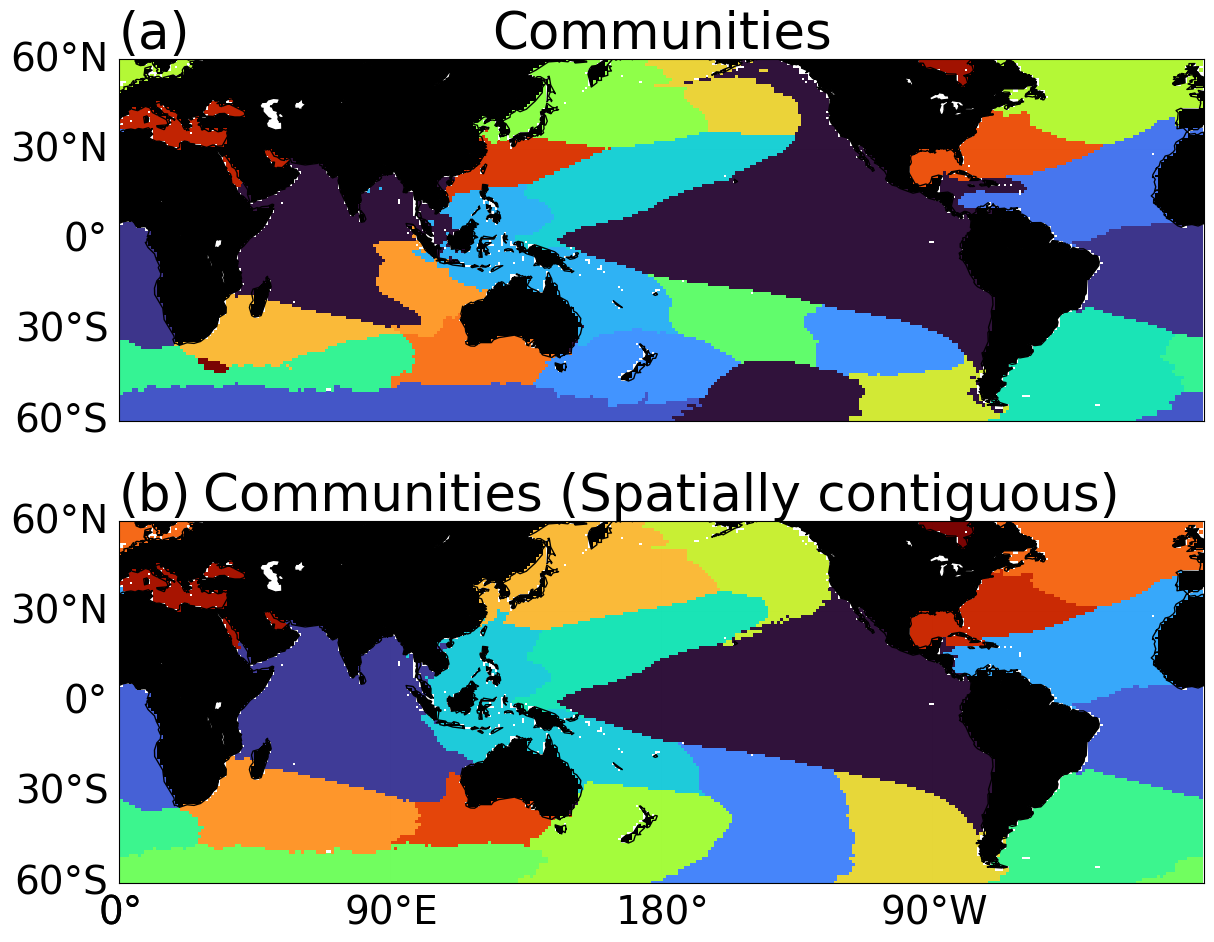

In [13]:
from mpl_toolkits.basemap import shiftgrid

fig = plt.figure(figsize=(14,11))

ax = fig.add_subplot(211)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
#map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,community_map_noH,cmap=plt.cm.turbo)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title('Communities', fontsize = 37)
plt.title('(a)', loc = 'left', fontsize = 37)

ax = fig.add_subplot(212)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,community_map_H,cmap=plt.cm.turbo)


# Plot domain id
plt.title('Communities (Spatially contiguous)', fontsize = 37)
plt.title('(b)', loc = 'left', fontsize = 37)

fig.savefig('./figures/communities_local_vs_nonlocal.pdf',bbox_inches='tight') # bbox_inches='tight'

## Communities and signals

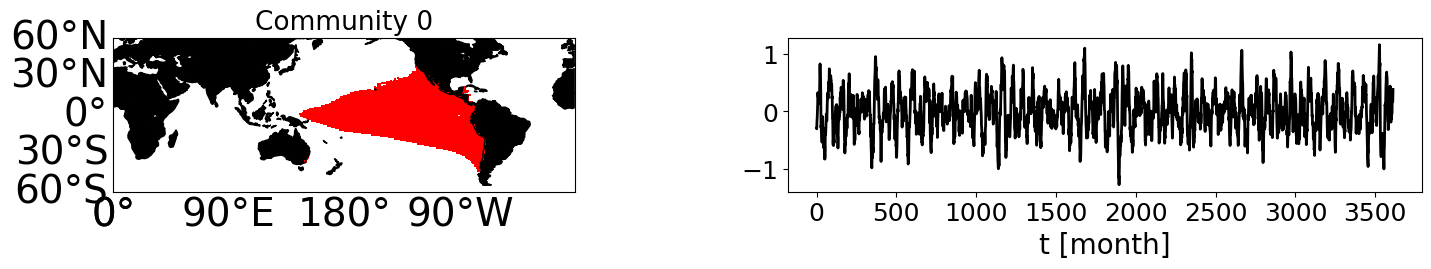

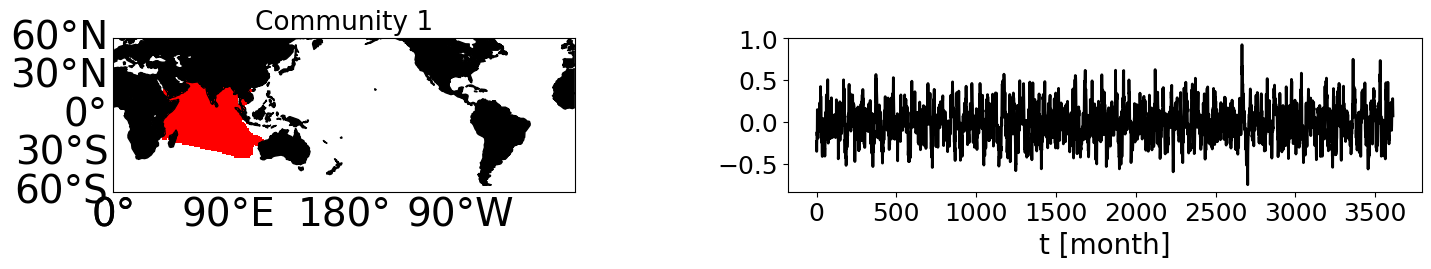

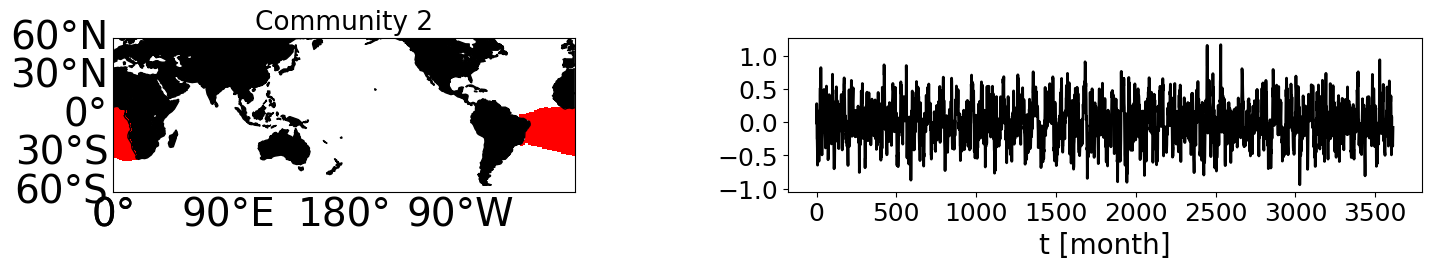

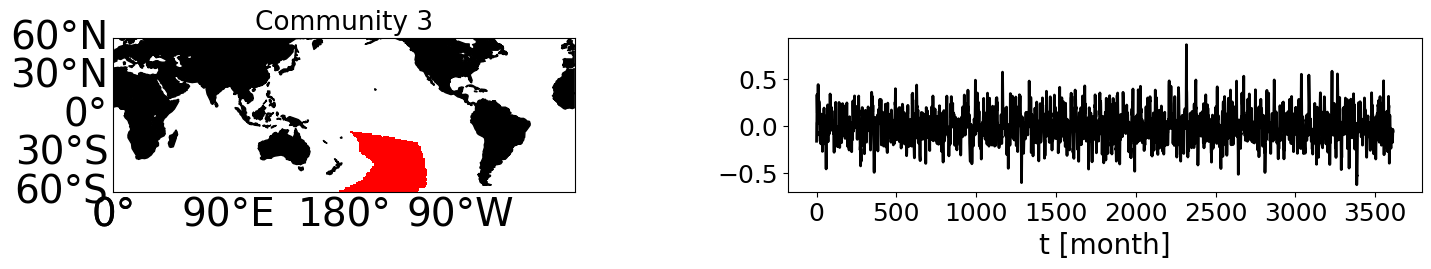

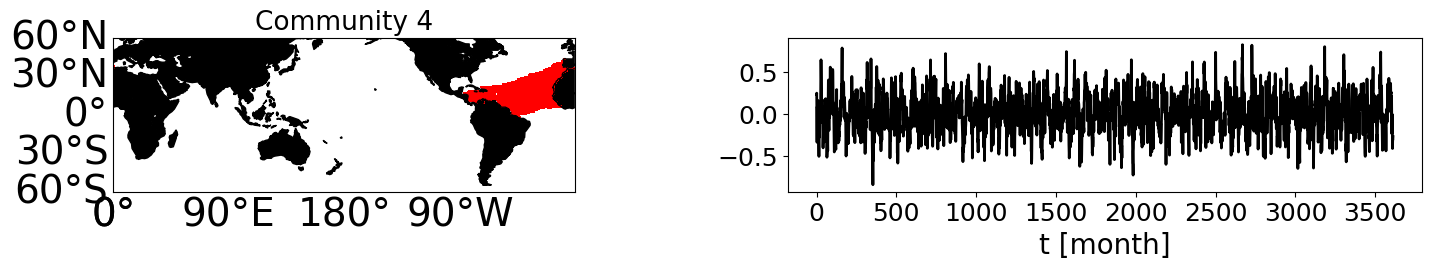

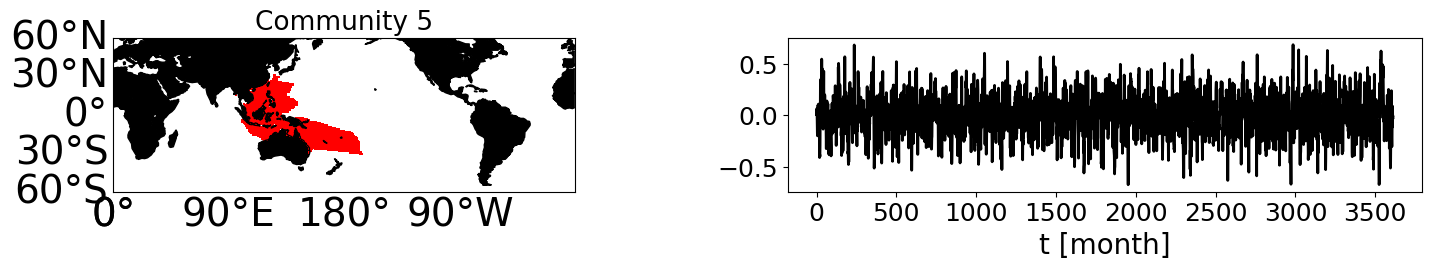

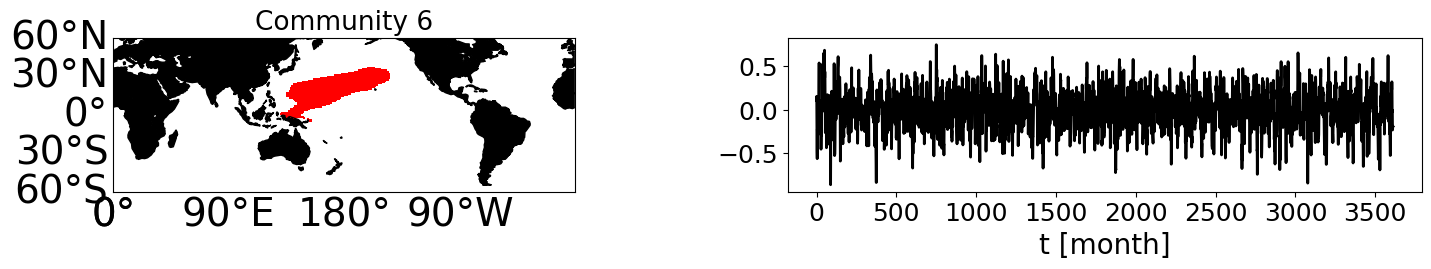

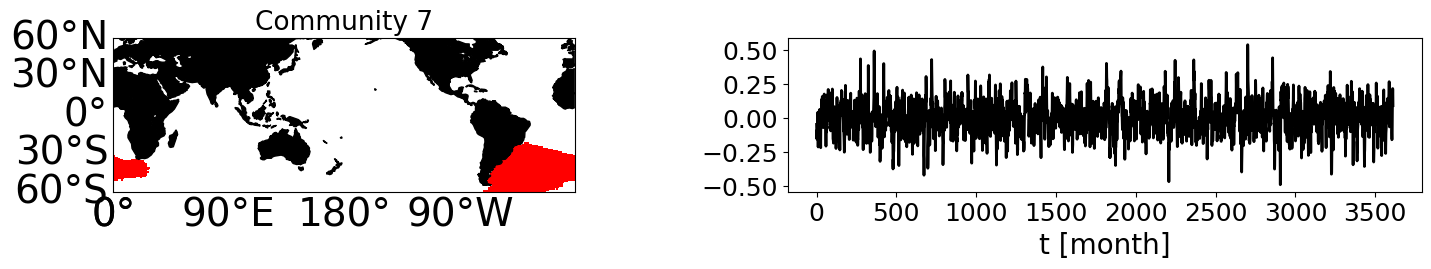

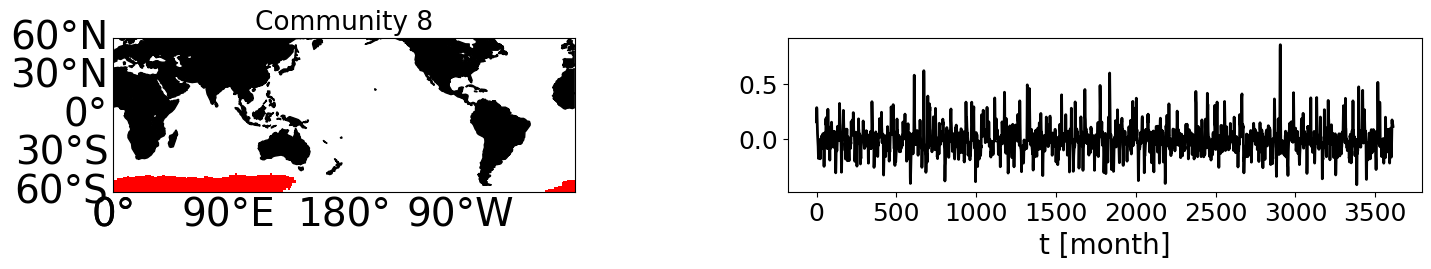

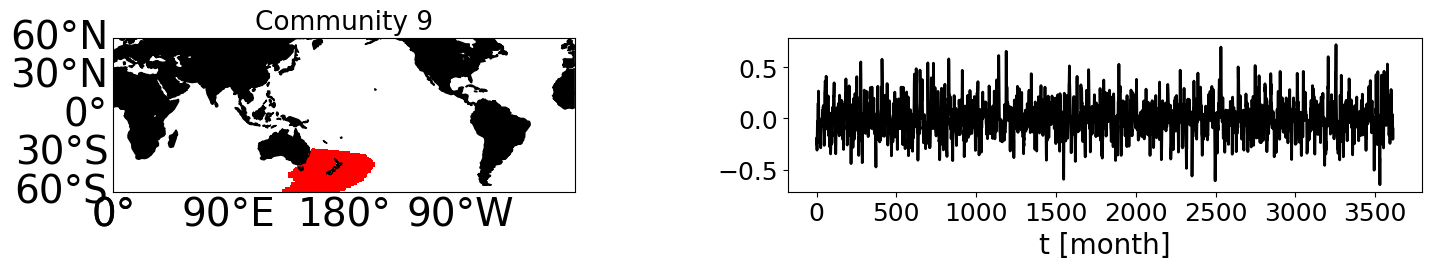

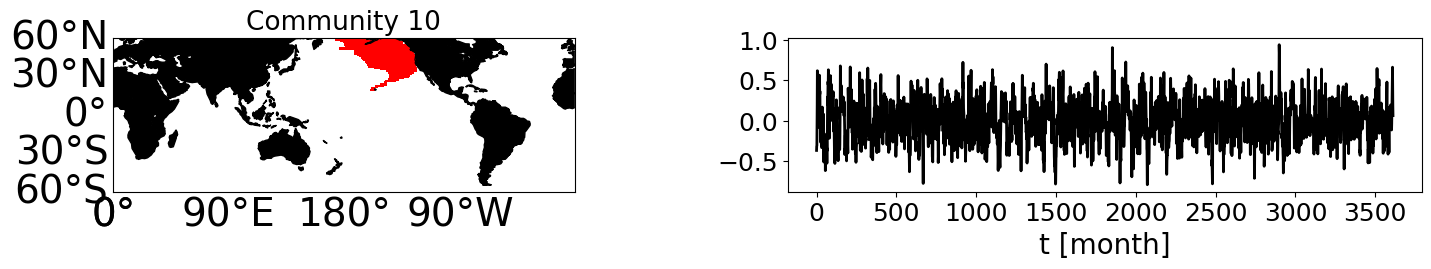

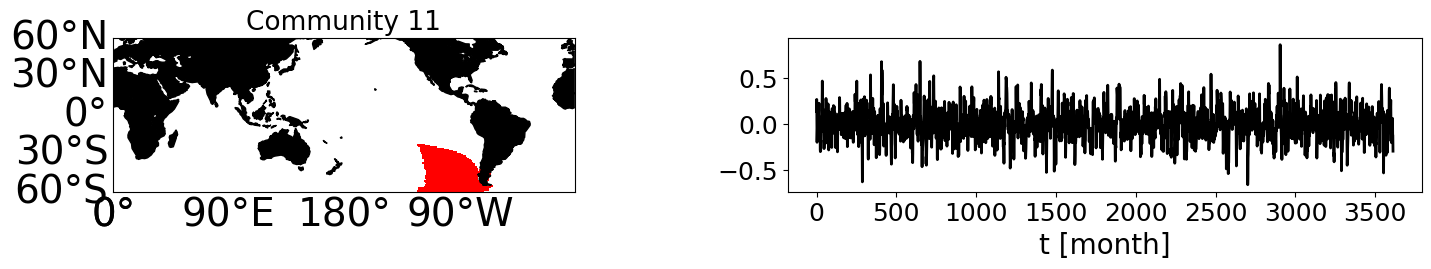

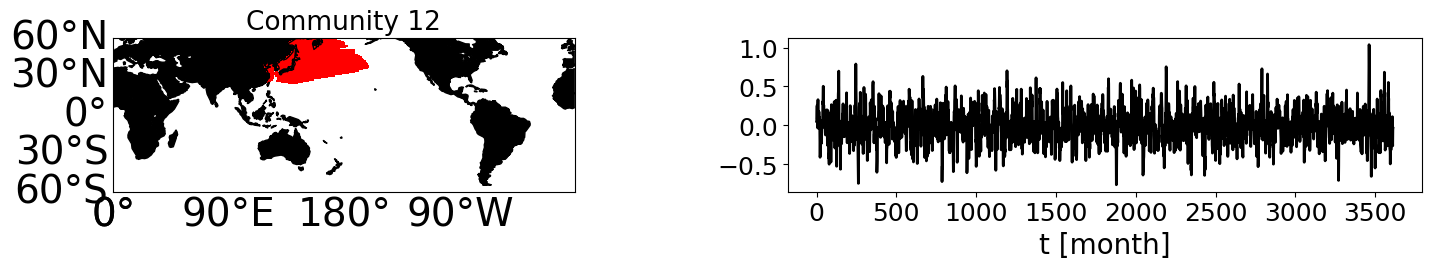

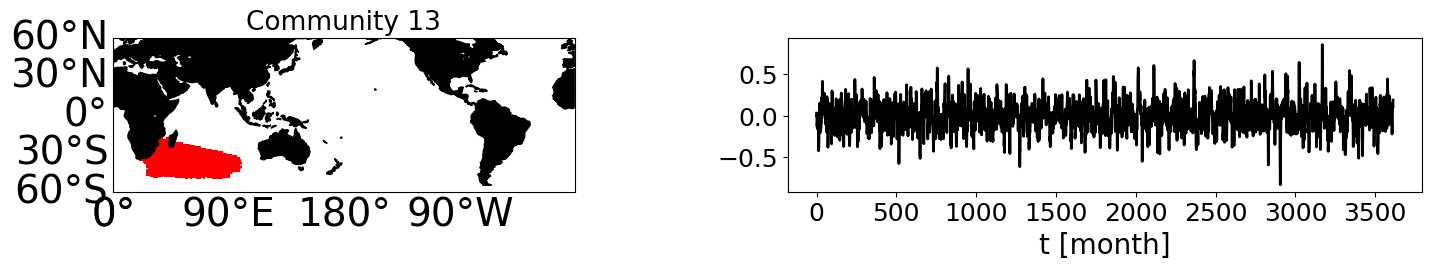

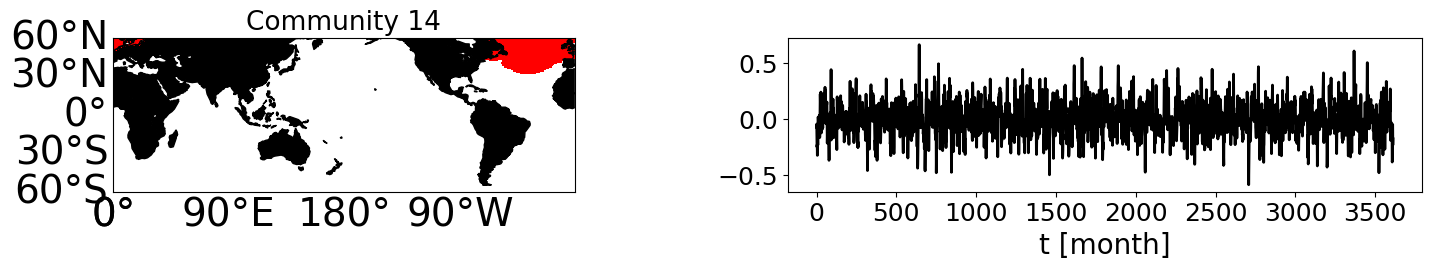

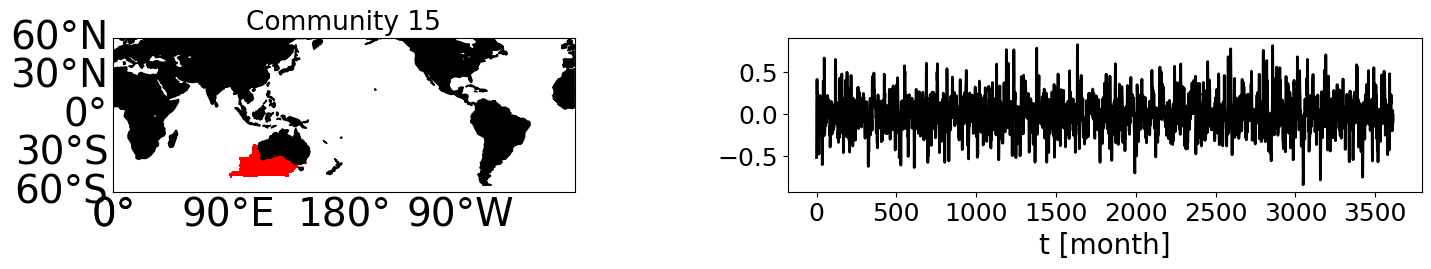

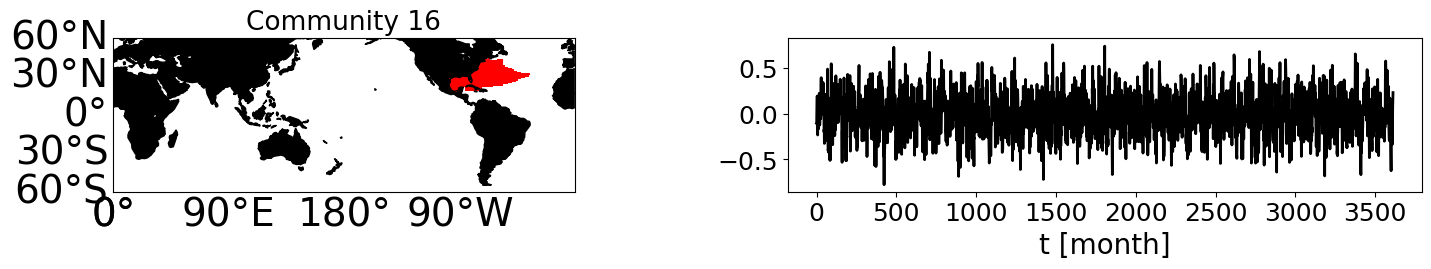

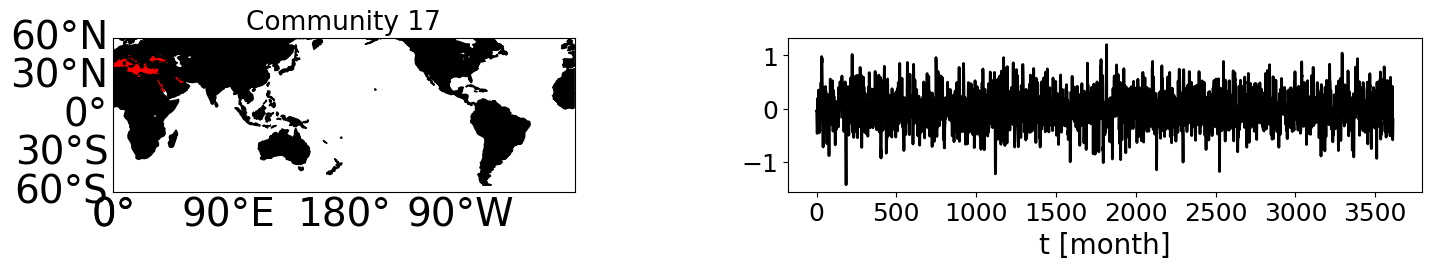

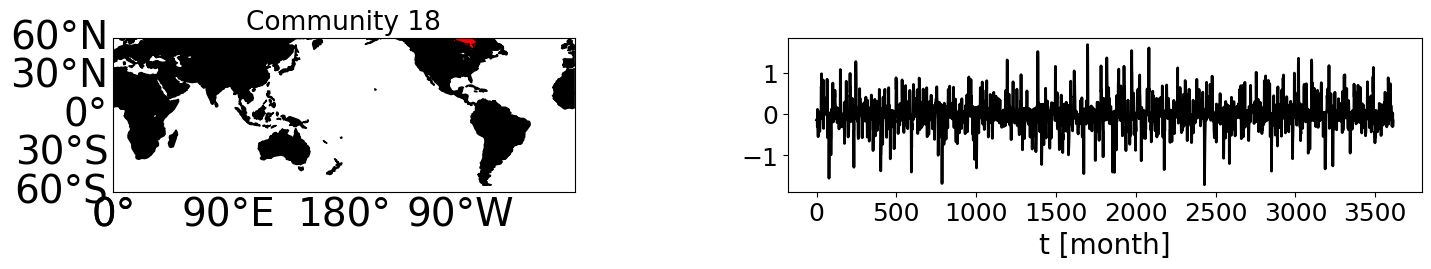

In [14]:
# Let's look at all average signals
for i in range(len(average_signals_H)):
    
    
    fig = plt.figure(figsize=(18,2))

    ax = fig.add_subplot(121)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

    map.drawcoastlines()
    map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
    map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
    map.fillcontinents(color = 'black')

    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities_H[i],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('Community '+str(i), fontsize = 19)

    
    ax = fig.add_subplot(122)  
    
    plt.plot(average_signals_H[i],"-k",linewidth = 2)
    plt.xlabel('t [month]',fontsize = 20)
    #ax.set_xticks([0,60,120,180,240,300,360,420])
    #ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
    plt.ylabel('',fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.subplots_adjust(wspace=0.2, hspace=0)
    
    
    plt.show()

# Analyze correlograms

In [15]:
community_map = np.load('./results/community_map_infomap_H.npy')
single_communities = np.load('./results/single_communities_infomap_H.npy')
average_signals = np.load('./results/average_signals_infomap_H.npy')

In [16]:
single_communities.shape

(19, 120, 360)

In [17]:
import utils_linear_response

In [18]:
import utils

import utils_linear_response

standardize_signals = utils_linear_response.remove_mean(average_signals)
standardize_signals = utils_linear_response.standardize(standardize_signals)

correlograms = []
tau_range = 3000

for i in range(len(standardize_signals)):

    correlograms.append(utils.get_correlogram(standardize_signals[i],standardize_signals[i],tau_range))
    
correlograms = np.array(correlograms)    

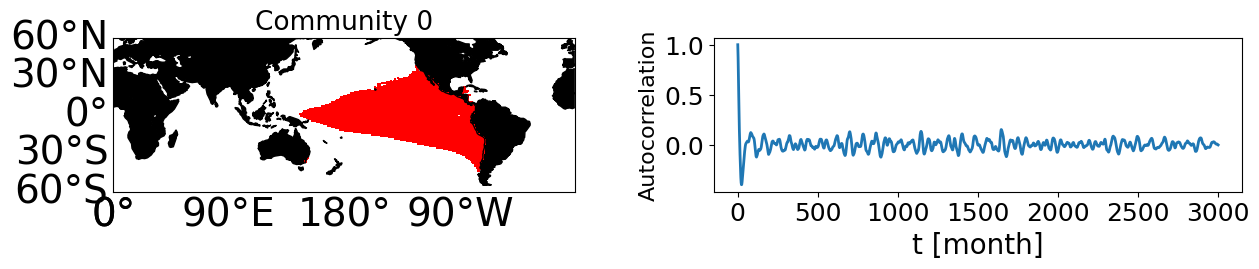

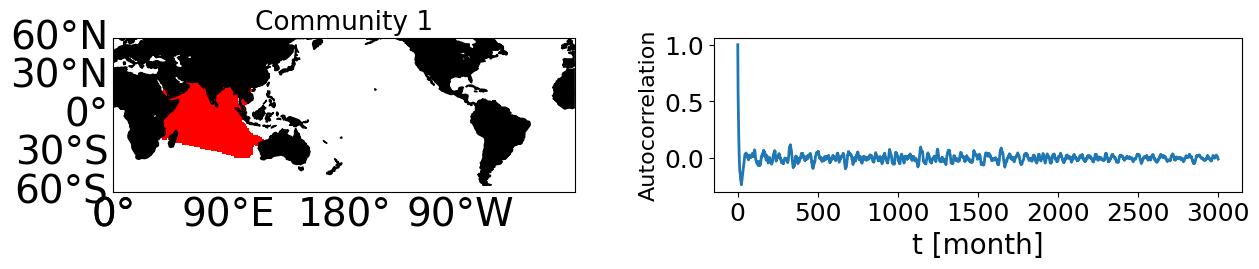

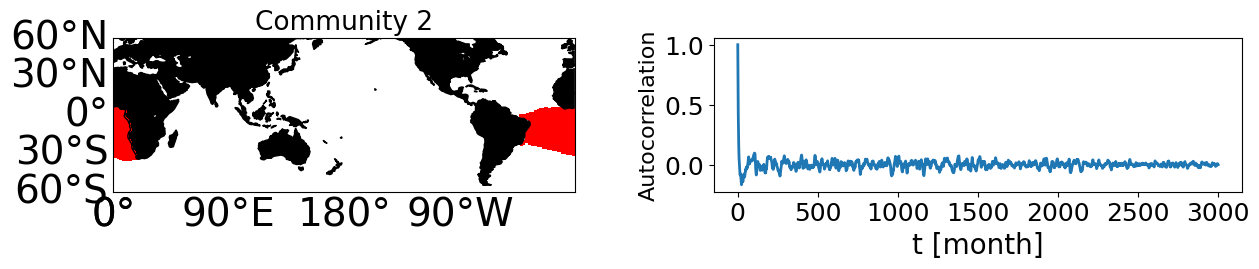

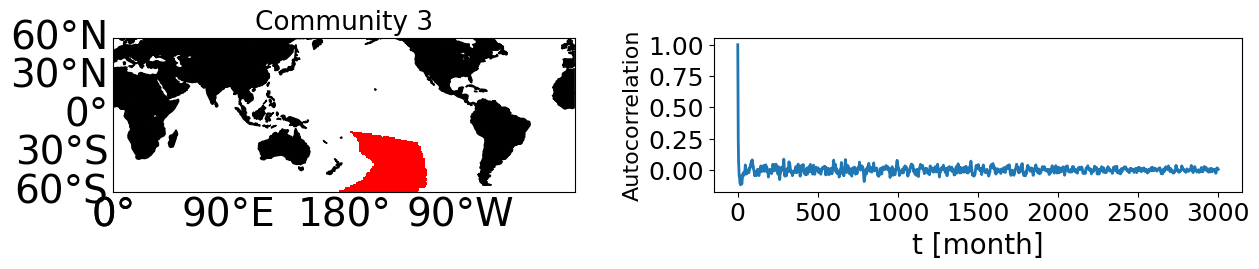

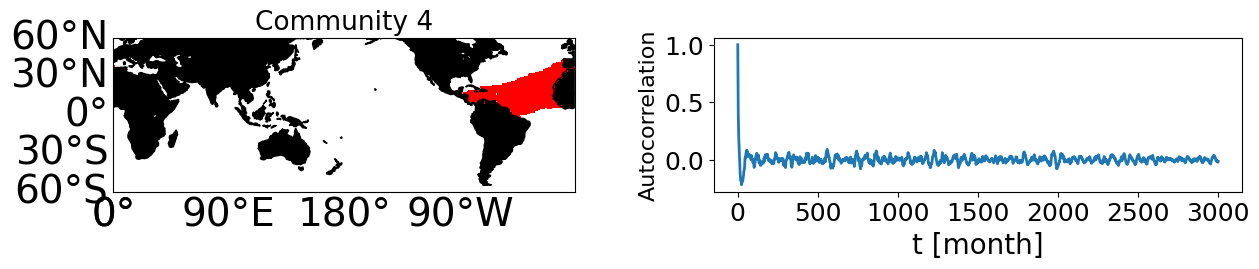

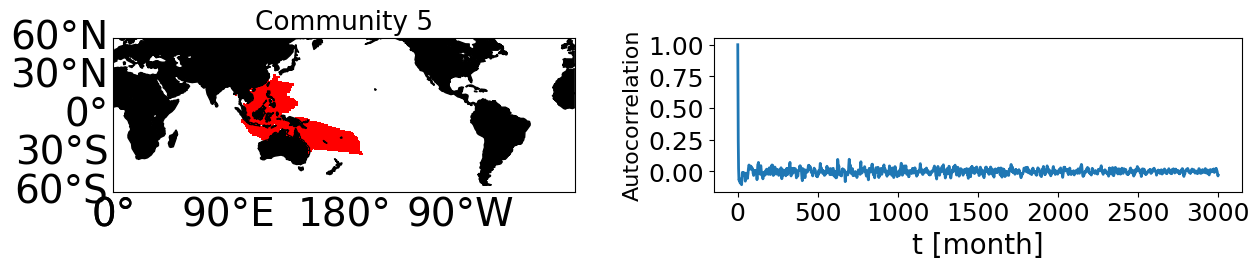

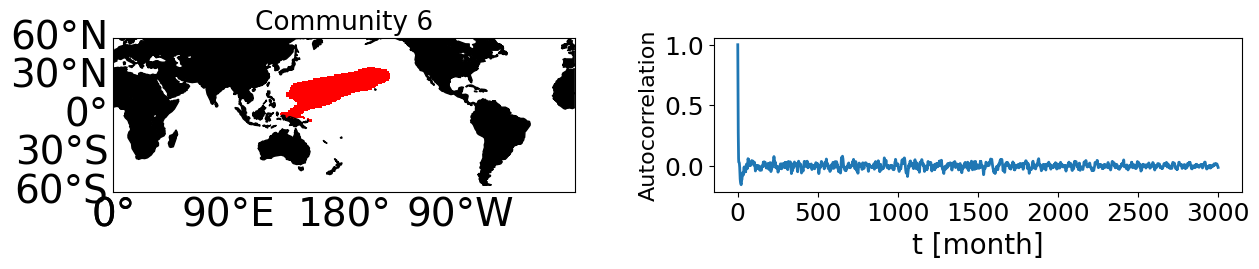

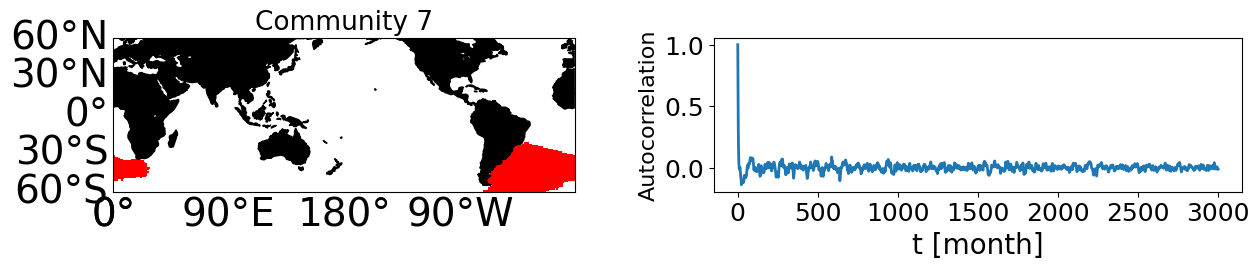

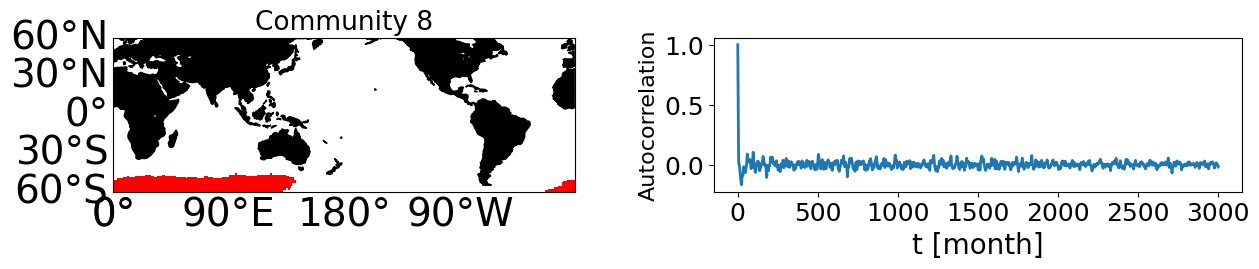

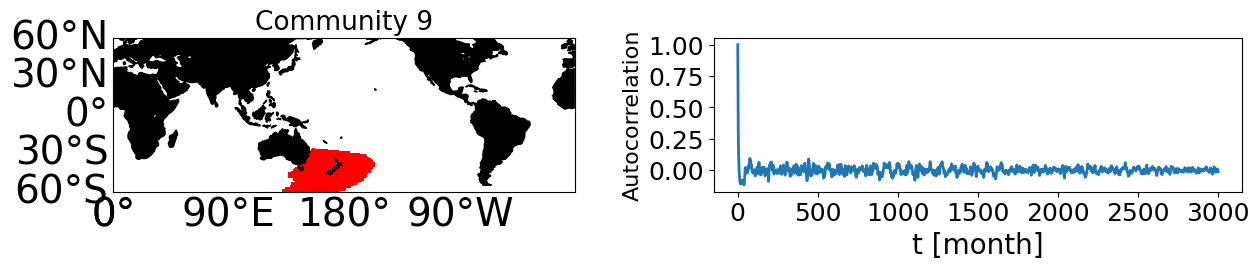

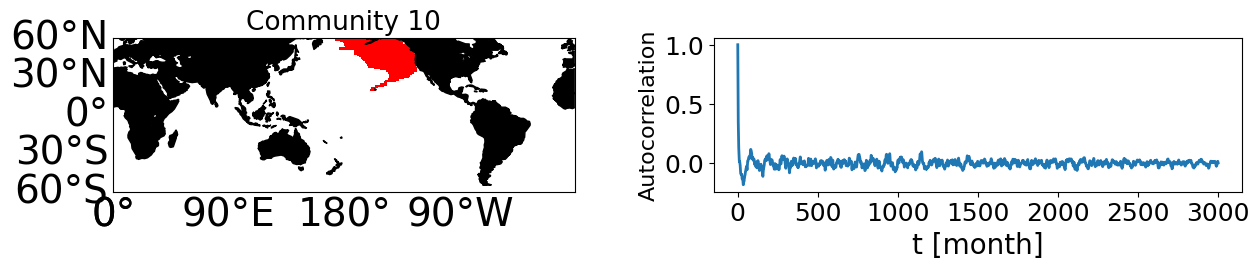

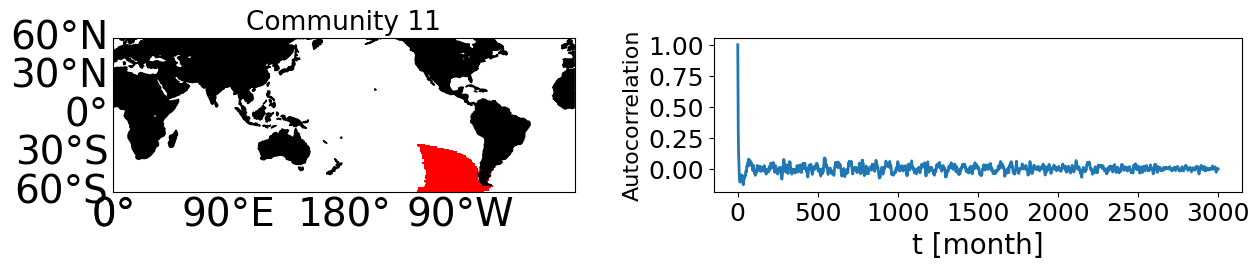

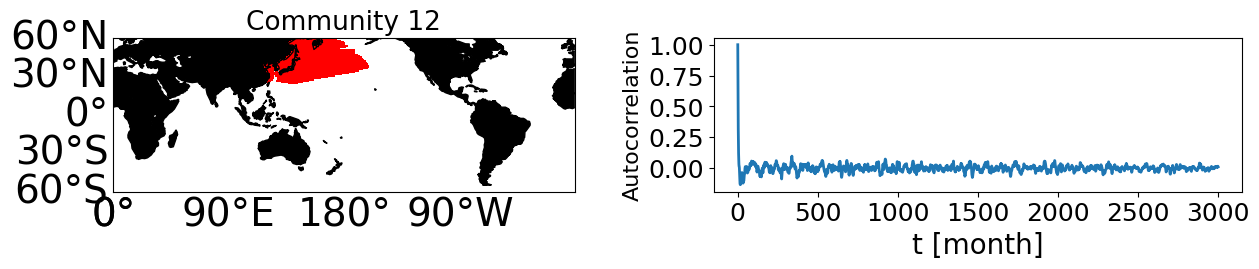

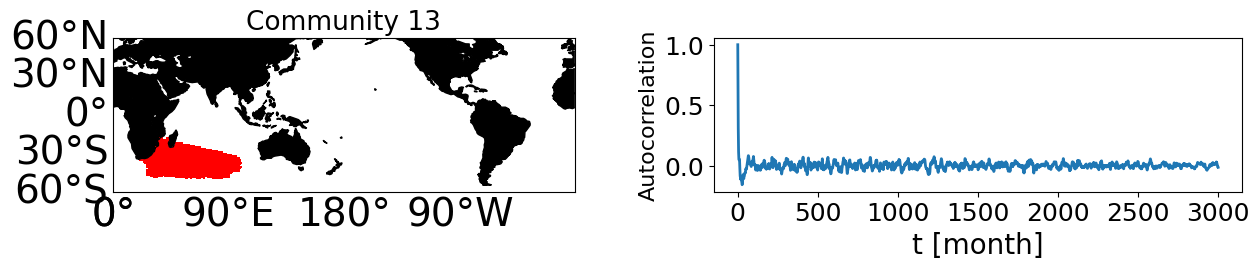

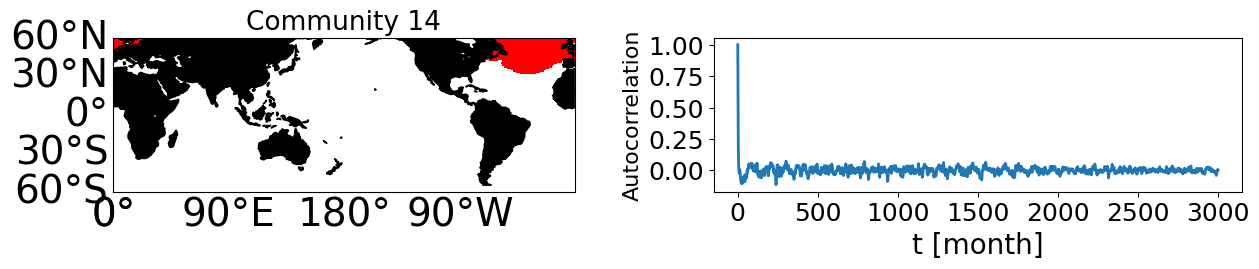

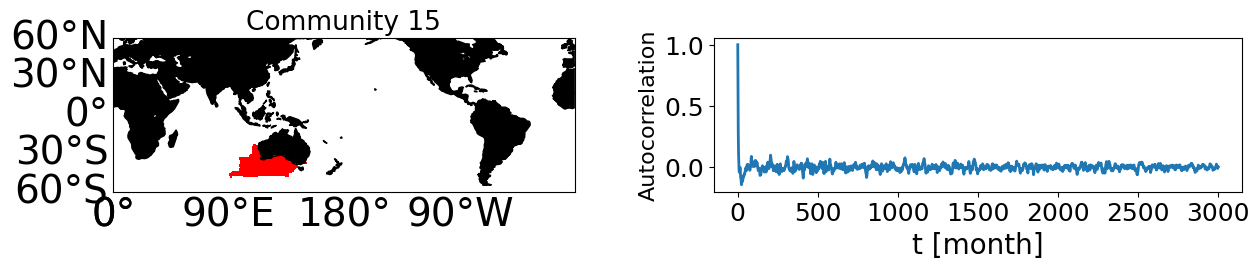

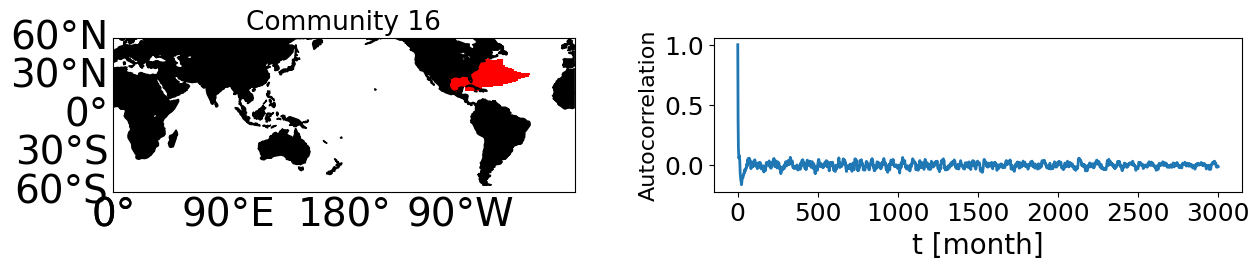

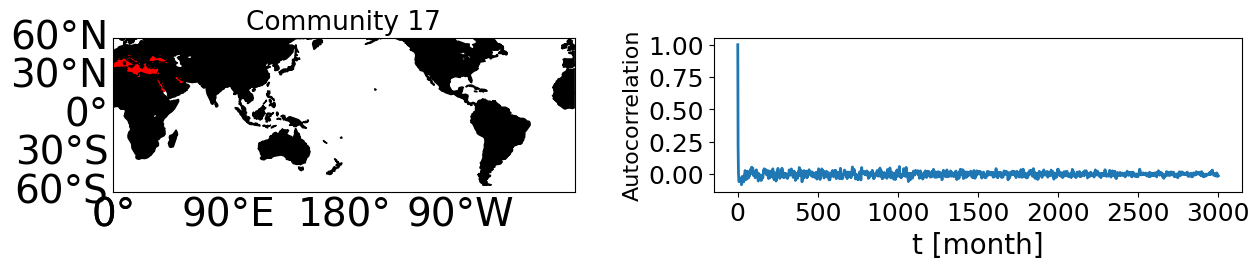

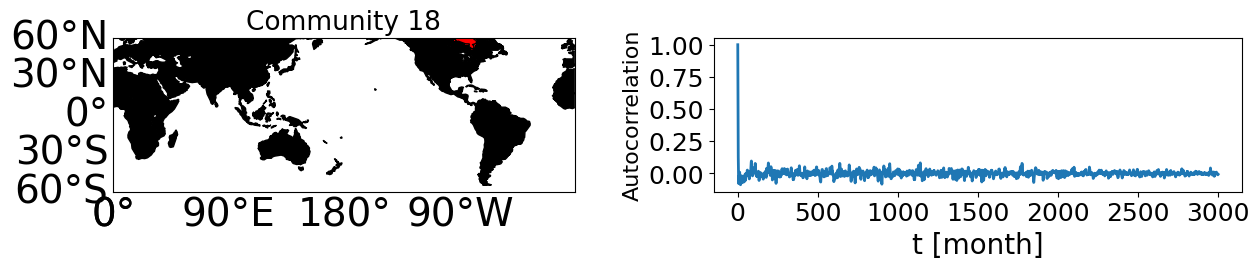

In [19]:
# Let's look at all average signals
for i in range(len(average_signals)):
    
    
    fig = plt.figure(figsize=(15,2))

    ax = fig.add_subplot(121)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

    map.drawcoastlines()
    map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
    map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
    map.fillcontinents(color = 'black')

        #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[i],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('Community '+str(i), fontsize = 19)

    
    ax = fig.add_subplot(122)  
    
    #plt.plot(average_signals[i],"-k",linewidth = 2)
    plt.plot(correlograms[i,tau_range:,0],correlograms[i,tau_range:,1],'-',linewidth = 2,markersize = 10)
    plt.xlabel('t [month]',fontsize = 20)
    #ax.set_xticks([0,60,120,180,240,300,360,420])
    #ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
    plt.ylabel('Autocorrelation',fontsize = 16)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.subplots_adjust(wspace=0.2, hspace=0)
    
    
    plt.show()

# A look at the histograms

In [20]:
community_map = np.load('./results/community_map_infomap_H.npy')
single_communities = np.load('./results/single_communities_infomap_H.npy')
average_signals = np.load('./results/average_signals_infomap_H.npy')

In [21]:
# First step: remove mean and standard deviation
normed_signals = average_signals.copy()

for i in range(len(normed_signals)):
    normed_signals[i] = (average_signals[i] - np.mean(average_signals[i]))/np.std(average_signals[i])

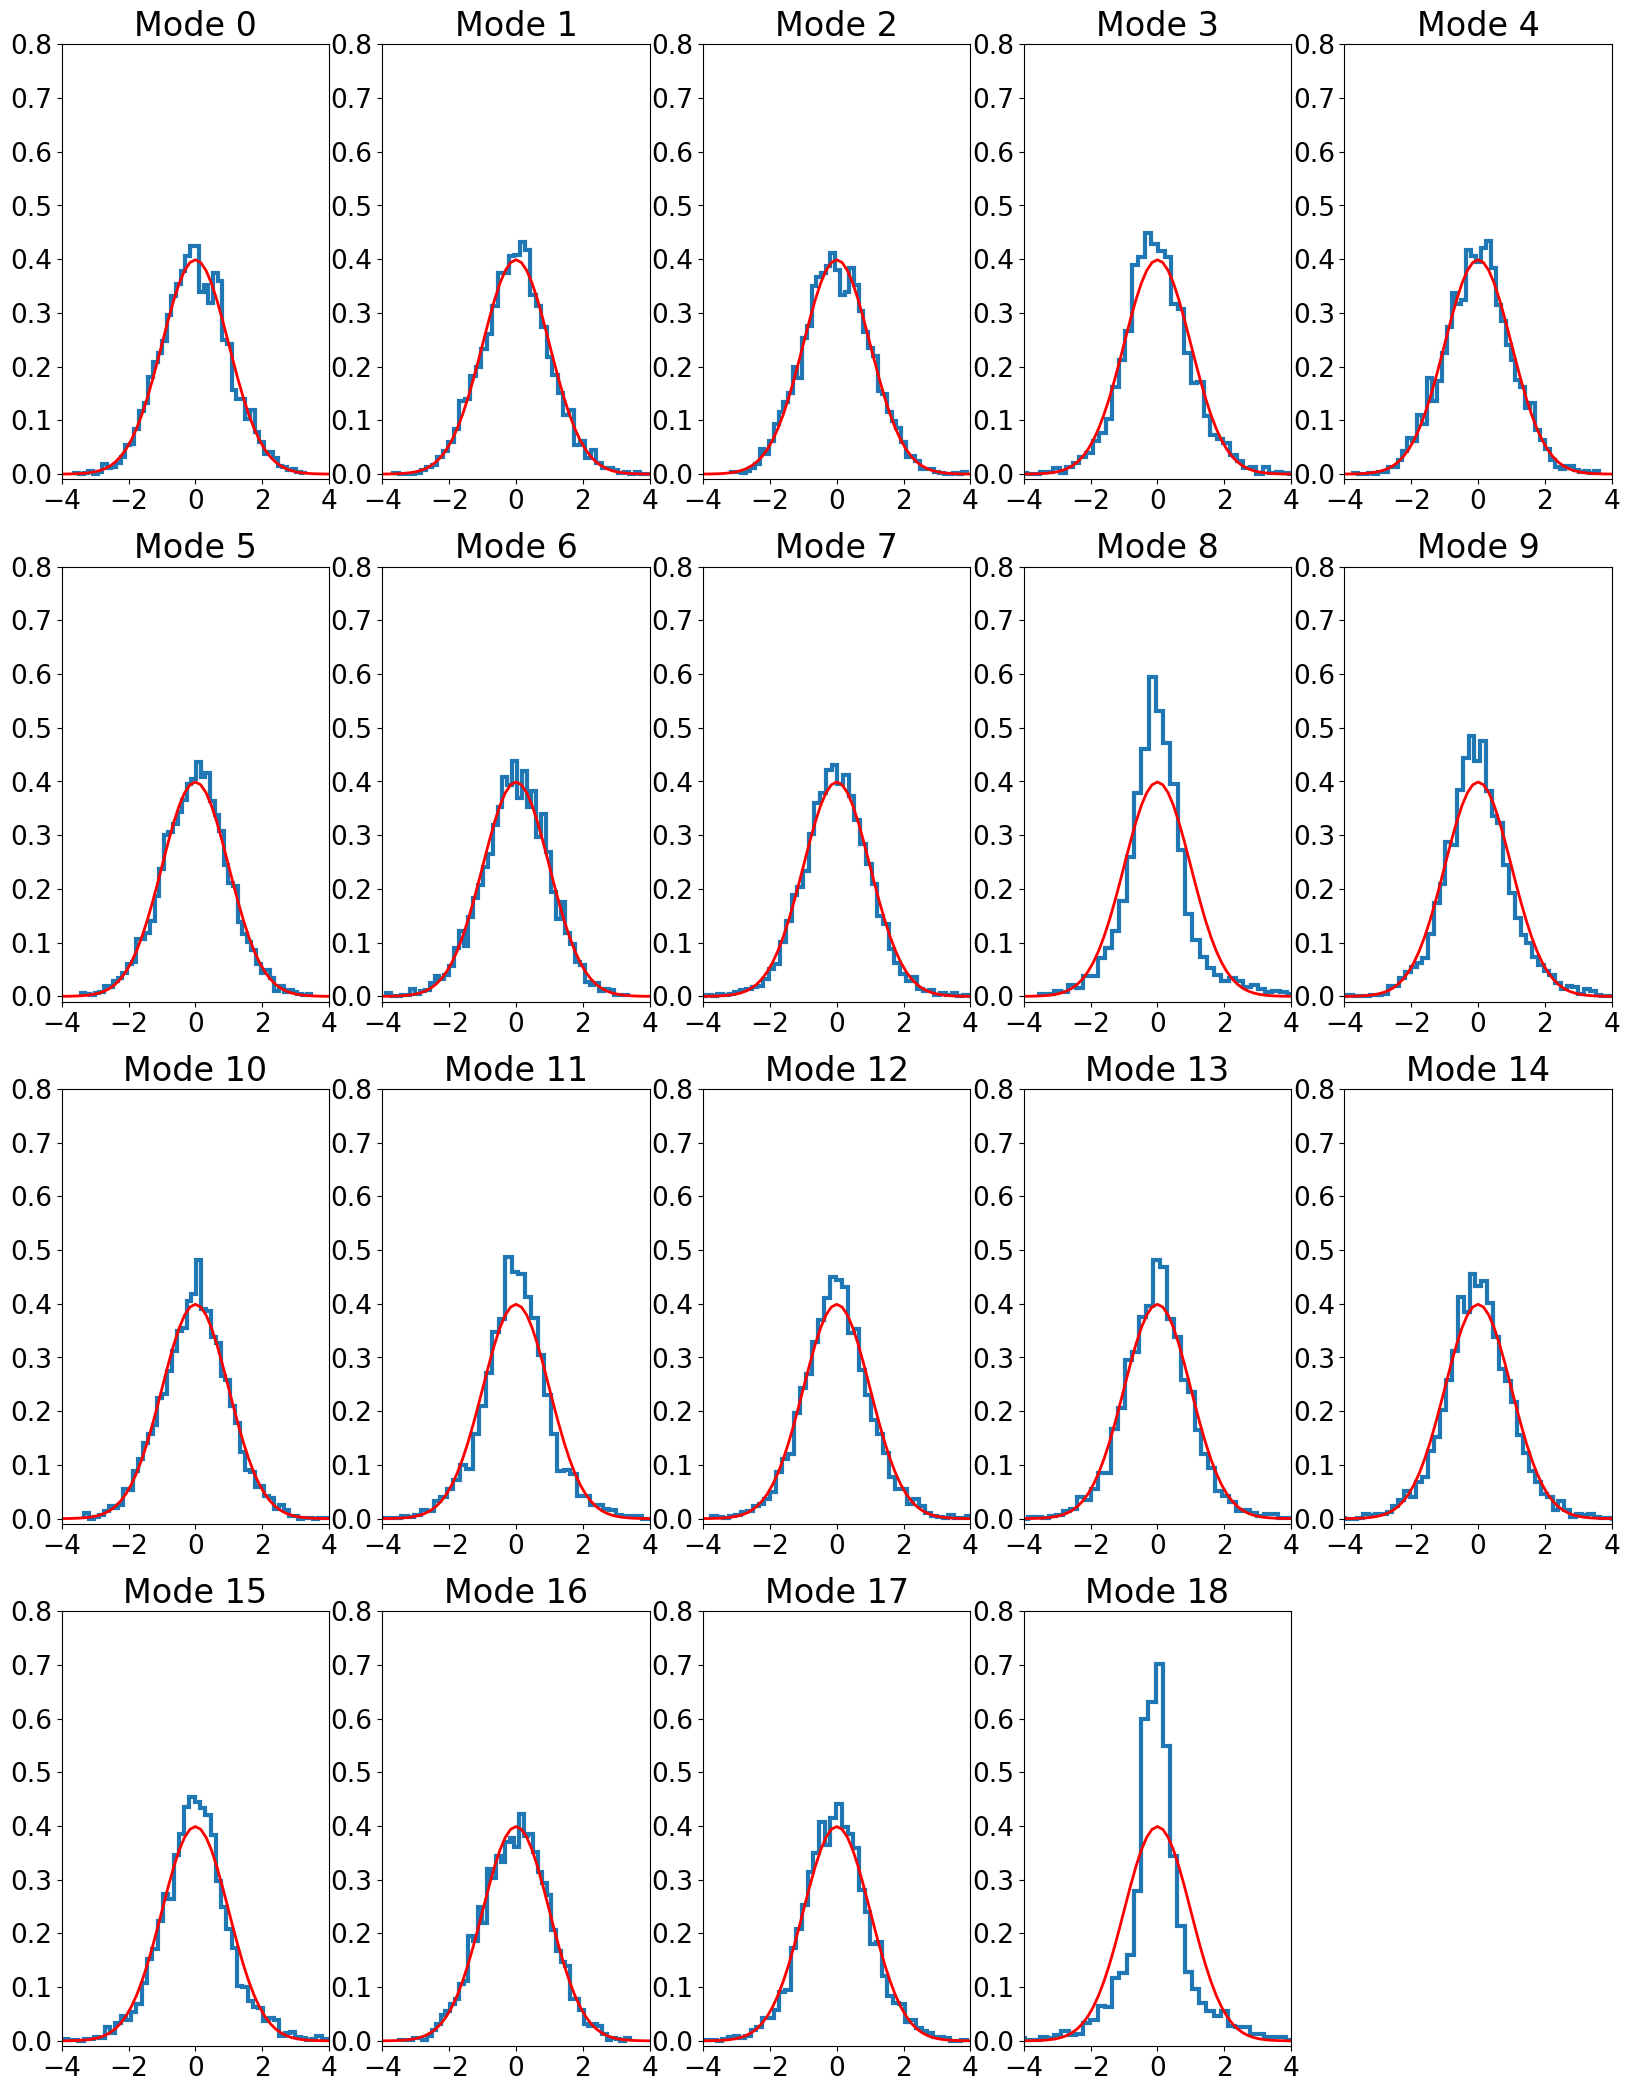

In [22]:
fig = plt.figure(figsize=(20,26))

bns = 50
alpha_b = 1
fontsize_ticks = 19
fontsize_legend = 10

xlim_minus = -4
xlim_plus = +4

ylim_minus = -.01
ylim_plus = +0.8

i = 1

for i in np.arange(1,len(normed_signals)+1,1):

    ax = fig.add_subplot(4,5,i)  

    com = i - 1

    n, bins, patches = plt.hist(normed_signals[com], bins= bns, alpha = alpha_b, histtype = 'step',
                                linewidth = 3,rwidth=1,log = False, label= 'original',density=True)
    
    mu = np.mean(normed_signals[com])
    sigma = np.std(normed_signals[com])
    
    bins_gaussian = np.linspace(xlim_minus, xlim_plus, num=bns+1)
    
    plt.plot(bins_gaussian, 1/(sigma * np.sqrt(2 * np.pi)) *

                   np.exp( - (bins_gaussian - mu)**2 / (2 * sigma**2) ),

             linewidth=2, color='r')

    plt.xlim([xlim_minus,xlim_plus])
    plt.ylim([ylim_minus,ylim_plus])
    #plt.xlabel('SSTa',fontsize = fontsize_ticks)
    plt.title('Mode '+str(com),fontsize = 24)
    plt.xticks(fontsize = fontsize_ticks)
    plt.yticks(fontsize = fontsize_ticks)
    
fig.savefig('./figures/distributions_global.pdf',bbox_inches='tight') # bbox_inches='tight'    

# Causality through linear response theory

This part can (should?) computed on the server Greene.

In [23]:
community_map = np.load('./results/community_map_infomap_H.npy')
single_communities = np.load('./results/single_communities_infomap_H.npy')
average_signals = np.load('./results/average_signals_infomap_H.npy')

In [24]:
import utils_linear_response

In [25]:
signals = average_signals

In [26]:
# Time length
n_time = np.shape(signals)[1]
# Number of time series
n_ts = np.shape(signals)[0]

In [27]:
np.shape(signals)

(19, 3612)

In [28]:
import utils_linear_response

In [29]:
# inputs
tau_max = 12 * 10  # ~12 years in monthly resolution
standardized = 'yes' # response computed via covariance functions

response_matrix_filter_10yrs = utils_linear_response.response(signals,tau_max,standardized)

In [30]:
np.save('./results/response_matrix.npy',response_matrix_filter_10yrs)

In [52]:
############################## Step (a)
# Compute the lag 1 autocorrelation

# lag-1 autocorrelation
print('Computing lag-1 autocorr')
phi = utils_linear_response.phi_vector(signals)

############################## Step (b)
# Compute standard deviations of each time series

# sigmas
print('Computing sigmas')
sigmas = utils_linear_response.sigmas(signals)

### Parameters

# we compute responses up to a lag tau_max
tau_max = 120
# we compute covariances
standardized = 'yes'

s = 3

# This correspondes to +/- 3 sigmas

s_minus, s_plus = utils_linear_response.compute_quantile_analytical_tau_discrete(signals,phi,sigmas,tau_max,s,standardized='yes')

Computing lag-1 autocorr
Computing sigmas



In [53]:
np.save('./results/analytical_plus_3sigma.npy',s_plus)
np.save('./results/analytical_minus_3sigma.npy',s_minus)

# Analysis of Fluctuation Dissipation Relationship and Causality

In [54]:
# Not filtered
response_matrix = np.load('./results/response_matrix.npy')
s_plus = np.load('./results/analytical_plus_3sigma.npy')
s_minus = np.load('./results/analytical_minus_3sigma.npy')
single_communities = np.load('./results/single_communities_infomap_H.npy')

## Causal strength

In [78]:
# Function to define node_strength with statistical significance
# (There are better ways to write this.)

def node_strength_significance(response_matrix,conf_bounds_plus,conf_bounds_minus, absolute_value):
    
    # Inputs
    # - response_matrix
    # - significance_right_tail: for example the 99th percentile of the ensemble of null models
    # - significance_left_tail: for example the 1st percentile of the ensemble of null models
    
    # Outputs:
    # - strengths_j_k: strength of the connection j -> k
    # If the original response matrix is n by n, strengths_j_k will be n x (n - 1)
    # as it will not consider self links
    
    time = np.shape(response_matrix)[0]
    # number of rows = number of columns = n
    n = np.shape(response_matrix)[1]
    
    # response_matrix_significant: assign zero if not significant
    response_matrix_significant = response_matrix.copy()
    
    # if you are not significant we change you to zero
    indices = (response_matrix < conf_bounds_plus) & (response_matrix > conf_bounds_minus)
    response_matrix_significant[indices] = 0
    
    # Strength of link j -> k
    strengths_j_k = np.zeros([n,n])
    
    if absolute_value == 'yes':
    
        # Response j -> k in absolute value
        abs_response_j_k = np.abs(response_matrix_significant[1:])
        # Compute strength of j -> k
        strengths_j_k = np.transpose(np.sum(abs_response_j_k,axis = 0))
    
        # When computing strengths we remove the j -> j connection
        # remove diagonal
        strengths_j_k_off_diagonal = strengths_j_k[~np.eye(strengths_j_k.shape[0],dtype=bool)].reshape(strengths_j_k.shape[0],-1)
    
        # Strength of node j
        strengths_j = np.sum(strengths_j_k_off_diagonal,axis = 1)
        
    elif absolute_value == 'no':
    
        # Response j -> k in absolute value
        abs_response_j_k = response_matrix_significant[1:]
        # Compute strength of j -> k
        strengths_j_k = np.transpose(np.sum(abs_response_j_k,axis = 0))
    
        # When computing strengths we remove the j -> j connection
        # remove diagonal
        strengths_j_k_off_diagonal = strengths_j_k[~np.eye(strengths_j_k.shape[0],dtype=bool)].reshape(strengths_j_k.shape[0],-1)
    
        # Strength of node j
        strengths_j = np.sum(strengths_j_k_off_diagonal,axis = 1)    
    
    return strengths_j_k, strengths_j

In [36]:
response_matrix.shape

(120, 19, 19)

### Compute strengths

In [83]:
absolute_value = 'yes'
#strengths_j_k, strengths_j = node_strength_significance(response_matrix,null_response_high_percentile,null_response_low_percentile,absolute_value)
strengths_j_k, strengths_j = node_strength_significance(response_matrix,s_plus,s_minus,absolute_value)

In [84]:
# Print a causal strength map
communities_strength_map = single_communities.copy()

for i in range(len(single_communities)):
    community_strength = strengths_j[i]
    communities_strength_map[i] = single_communities[i] * community_strength
    
strength_map_tos = np.nansum(communities_strength_map,axis = 0)
strength_map_tos[strength_map_tos == 0] = np.nan

In [85]:
# save the strength map
np.save('./results/strength_map.npy',strength_map_tos)

### Compute link maps for the first 6 months

In [87]:
absolute_value = 'no'
strengths_j_k, strengths_j = node_strength_significance(response_matrix[0:6],s_plus[0:6],s_minus[0:6],absolute_value)

In [88]:
# Load longitudes and latitudes
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/Causality_work/model/dimensionality_reduction/Data/SST/Global/model_300years/highpass/tos_300yrs_1deg_nohl_a_monthly_anomalies_new_land0_filter10yr.nc'

climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'

import utils

data = utils.load_data(path,climate_variable)
data = utils.masked_array_to_numpy(data)

latitudes = utils.load_data(path,'lat')
latitudes = utils.masked_array_to_numpy(latitudes)

longitudes = utils.load_data(path,'lon')
longitudes = utils.masked_array_to_numpy(longitudes)

In [89]:
# Print causal strength maps

strength_ENSO = single_communities.copy()
enso_index = 0

strength_IO = single_communities.copy()
io_index = 1

strength_TA_S = single_communities.copy()
ta_s_index = 2

strength_TA_N = single_communities.copy()
ta_n_index = 4


for k in range(len(single_communities)): 
    # enso
    strength_ENSO[k] = single_communities[k] * strengths_j_k[enso_index,k]
    # io
    strength_IO[k] = single_communities[k] * strengths_j_k[io_index,k]
    # ta_s
    strength_TA_S[k] = single_communities[k] * strengths_j_k[ta_s_index,k]
    # ta_n
    strength_TA_N[k] = single_communities[k] * strengths_j_k[ta_n_index,k]
    
# remove your self
strength_ENSO = np.delete(strength_ENSO,enso_index,axis=0)
strength_IO = np.delete(strength_IO,io_index,axis=0)
strength_TA_S = np.delete(strength_TA_S,ta_s_index,axis=0)
strength_TA_N = np.delete(strength_TA_N,ta_n_index,axis=0)
    
strength_map_ENSO = np.nansum(strength_ENSO,axis = 0)
strength_map_IO = np.nansum(strength_IO,axis = 0)
strength_map_TA_S = np.nansum(strength_TA_S,axis = 0)
strength_map_TA_N = np.nansum(strength_TA_N,axis = 0)
#strength_map_ENSO[strength_map_ENSO == 0] = np.nan

In [90]:
# let's create a mask
mask = data.copy()
mask = np.std(data,axis = 0)
mask[mask == 0.] = np.nan
mask[~np.isnan(mask)] = 0

In [91]:
strength_map_tos = strength_map_tos+mask

In [92]:
np.nanmax(strength_map_tos)

40.121777

In [93]:
strength_map_ENSO = strength_map_ENSO + mask
strength_map_IO = strength_map_IO + mask
strength_map_TA_S = strength_map_TA_S + mask
strength_map_TA_N = strength_map_TA_N + mask

In [98]:
np.save('./results/link_map_ENSO.npy',strength_map_ENSO)
np.save('./results/link_map_IO.npy',strength_map_IO)
np.save('./results/link_map_TA_S.npy',strength_map_TA_S)
np.save('./results/link_map_TA_N.npy',strength_map_TA_N)
#np.save('./results/strength_map.npy',strength_map_tos)

## Plot communities and causal strength

In [99]:
community_map_noH = np.load('./results/community_map_infomap_no_H.npy')
single_communities_noH = np.load('./results/single_communities_infomap_no_H.npy')
average_signals_noH = np.load('./results/average_signals_infomap_no_H.npy')

community_map_H = np.load('./results/community_map_infomap_H.npy')
single_communities_H = np.load('./results/single_communities_infomap_H.npy')
average_signals_H = np.load('./results/average_signals_infomap_H.npy')

strength = np.load('./results/strength_map.npy')

/var/folders/w4/y5dbx4q17lb71s124n248j000000gn/T/ipykernel_40269/2195710622.py:65: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb=plt.colorbar(location='bottom',aspect=30,pad=0.1)


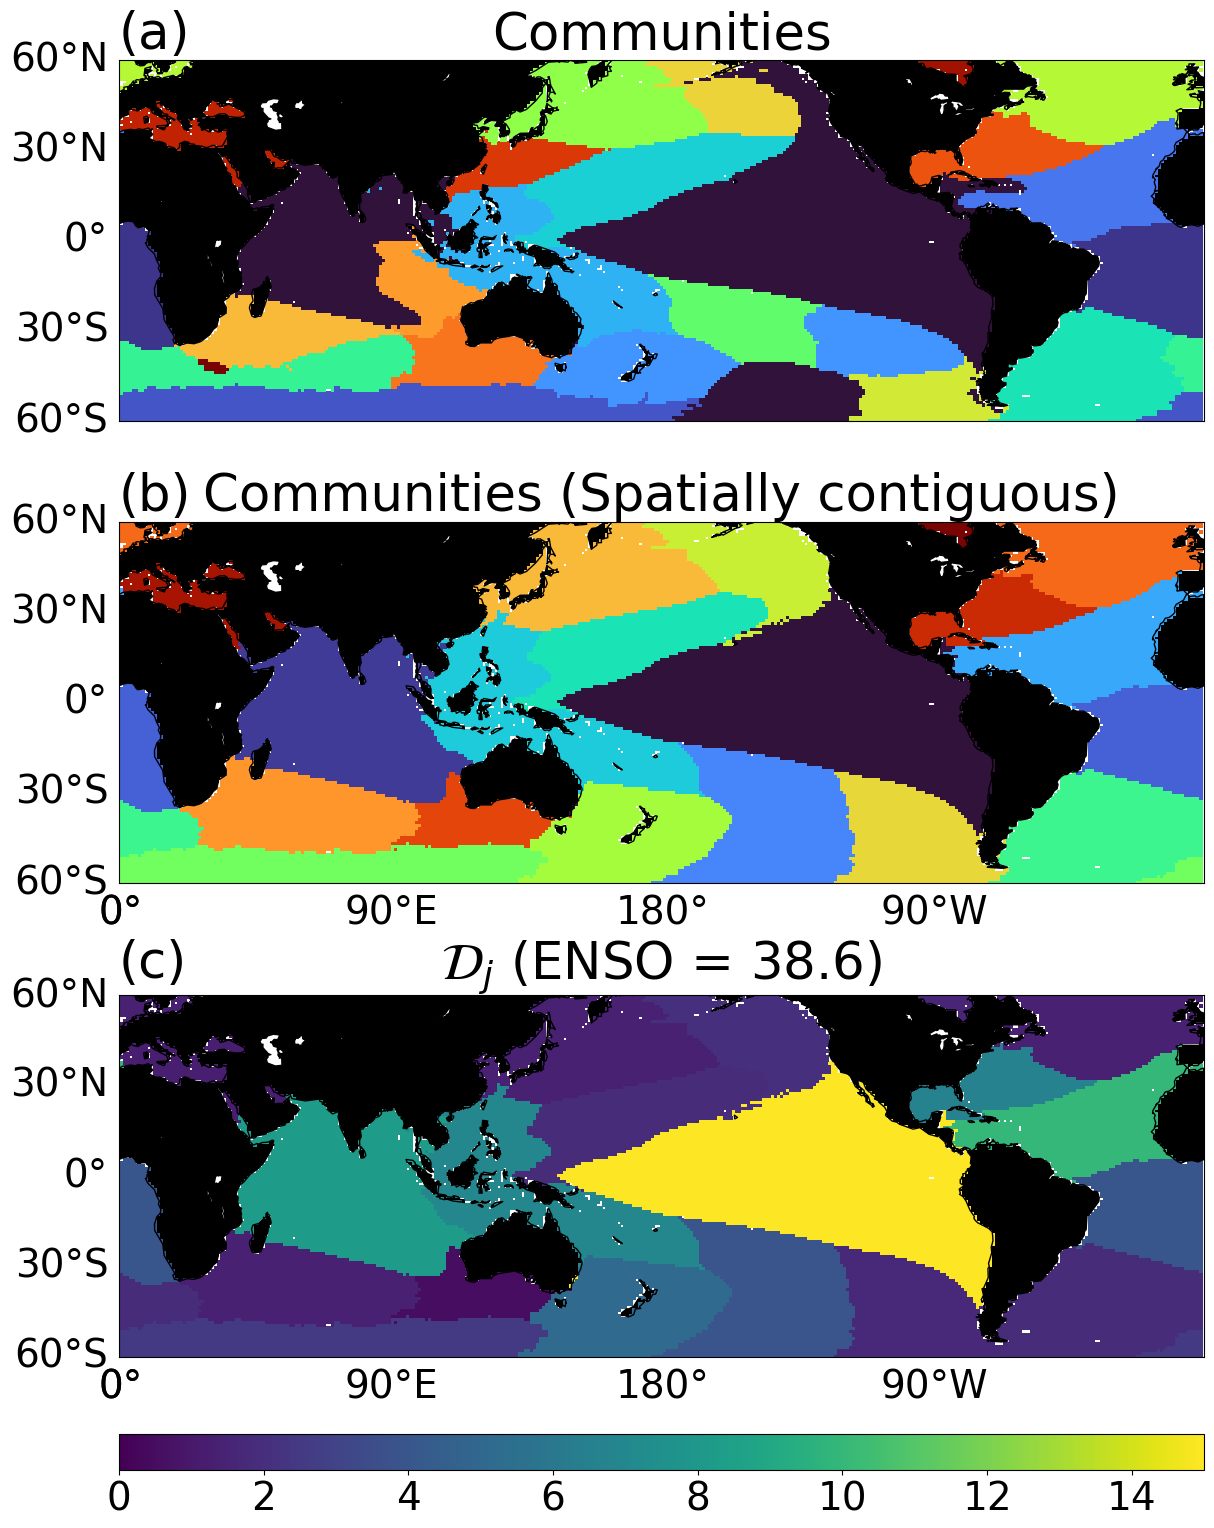

In [101]:
from mpl_toolkits.basemap import shiftgrid

fig = plt.figure(figsize=(14,22))

fontsize_title = 37
fontsize_coord = 12
labelsize_cb = 12
vmin_ENSO = -6.1
vmax_ENSO = +6.1
vmin_IO = -1.5
vmax_IO = +1.5
vmin_TAs = -2.2
vmax_TAs = +2.2
pad = 0.12
j_size = 19

ax = fig.add_subplot(311)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
#map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,community_map_noH,cmap=plt.cm.turbo)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title('Communities', fontsize = fontsize_title)
plt.title('(a)', loc = 'left', fontsize = fontsize_title)

ax = fig.add_subplot(312)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,community_map_H,cmap=plt.cm.turbo)


# Plot domain id
plt.title('Communities (Spatially contiguous)', fontsize = fontsize_title)
plt.title('(b)', loc = 'left', fontsize = fontsize_title)

ax = fig.add_subplot(313)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,strength,cmap=plt.cm.viridis,vmin = 0,vmax = 15)
cb=plt.colorbar(location='bottom',aspect=30,pad=0.1)
cb.ax.tick_params(labelsize=28)


# Plot domain id
plt.title(r'$\mathcal{D}_{j}$ (ENSO = 38.6)', fontsize = fontsize_title)
plt.title('(c)', loc = 'left', fontsize = fontsize_title)

plt.subplots_adjust(hspace=-0.4)

fig.savefig('./figures/communities_and_strengths.pdf',bbox_inches='tight') # bbox_inches='tight'

# Strengths and link maps

In [103]:
single_communities_H = np.load('./results/single_communities_infomap_H.npy')

strength = np.load('./results/strength_map.npy')

links_ENSO_GFDL = np.load('./results/link_map_ENSO.npy')
links_IO_GFDL = np.load('./results/link_map_IO.npy')
links_TA_S_GFDL = np.load('./results/link_map_TA_S.npy')
links_TA_N_GFDL = np.load('./results/link_map_TA_N.npy')

single_communities_H = np.load('./results/single_communities_infomap_H.npy')

# Causal link maps one year

In [107]:
import cmocean

/var/folders/w4/y5dbx4q17lb71s124n248j000000gn/T/ipykernel_40269/966711271.py:38: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
/var/folders/w4/y5dbx4q17lb71s124n248j000000gn/T/ipykernel_40269/966711271.py:60: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
/var/folders/w4/y5dbx4q17lb71s124n248j000000gn/T/ipykernel_40269/966711271.py:82: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb=plt.colorbar(locat

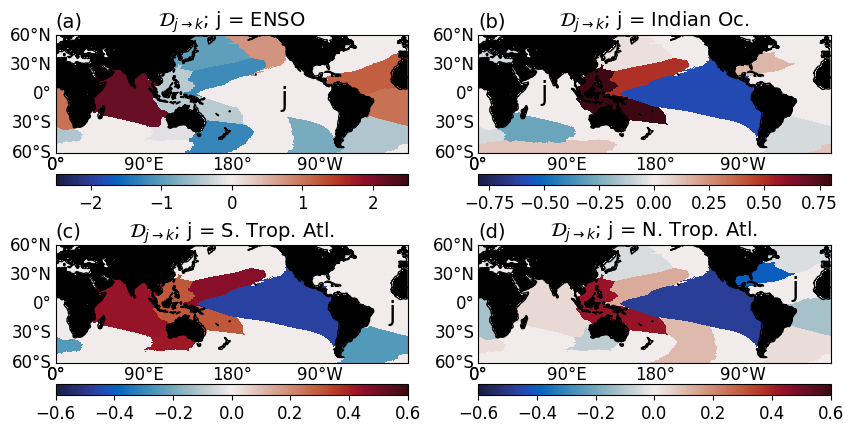

In [109]:
from mpl_toolkits.basemap import shiftgrid

fig = plt.figure(figsize=(10,5))

fontsize_title = 14
fontsize_coord = 12
labelsize_cb = 12

vmin_ENSO = -2.5
vmax_ENSO = +2.5

vmin_IO = -0.8
vmax_IO = +0.8

vmin_TAs = -0.6
vmax_TAs = +0.6

vmin_TAn = -0.6
vmax_TAn = +0.6

pad = 0.12
j_size = 19


########################### ENSO causal links
ax = fig.add_subplot(221)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = fontsize_coord,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = fontsize_coord,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,links_ENSO_GFDL,cmap=cmocean.cm.balance,vmin = vmin_ENSO, vmax = vmax_ENSO)
cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
cb.ax.tick_params(labelsize=labelsize_cb)
plt.text(230, -12, 'j', c = 'k', fontsize=j_size)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title(r'$\mathcal{D}_{j \rightarrow k}$; j = ENSO', fontsize = fontsize_title)
plt.title('(a)', loc = 'left', fontsize = fontsize_title)

########################### IO causal links
ax = fig.add_subplot(222)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = fontsize_coord,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = fontsize_coord,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,links_IO_GFDL,cmap=cmocean.cm.balance,vmin = vmin_IO, vmax = vmax_IO)
cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
cb.ax.tick_params(labelsize=labelsize_cb)
plt.text(64, -6, 'j', c = 'k', fontsize=j_size)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title(r'$\mathcal{D}_{j \rightarrow k}$; j = Indian Oc.', fontsize = fontsize_title)
plt.title('(b)', loc = 'left', fontsize = fontsize_title)

########################### TA_s causal links abs
ax = fig.add_subplot(223)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = fontsize_coord,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = fontsize_coord,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,links_TA_S_GFDL,cmap=cmocean.cm.balance,vmin = vmin_TAs, vmax = vmax_TAs)
cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
cb.ax.tick_params(labelsize=labelsize_cb)
plt.text(340, -16, 'j', c = 'k', fontsize=j_size)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title(r'$\mathcal{D}_{j \rightarrow k}$; j = S. Trop. Atl.', fontsize = fontsize_title)
plt.title('(c)', loc = 'left', fontsize = fontsize_title)

########################### TA_s causal links abs
ax = fig.add_subplot(224)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = fontsize_coord,linewidth=0.001)
map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = fontsize_coord,linewidth=0.001)
map.fillcontinents(color = 'black')

map.pcolor(longitudes,latitudes,links_TA_N_GFDL,cmap=cmocean.cm.balance,vmin = vmin_TAn, vmax = vmax_TAn)
cb=plt.colorbar(location='bottom',aspect=30,pad=pad)
cb.ax.tick_params(labelsize=labelsize_cb)
plt.text(320, 8, 'j', c = 'k', fontsize=j_size)
#map.pcolor(longitudes+100,latitudes,community_map_noH,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
plt.title(r'$\mathcal{D}_{j \rightarrow k}$; j = N. Trop. Atl.', fontsize = fontsize_title)
plt.title('(d)', loc = 'left', fontsize = fontsize_title)

fig.savefig('./figures/causal_link_maps_first_6months.pdf',bbox_inches='tight') # bbox_inches='tight'

## Focus on single domains

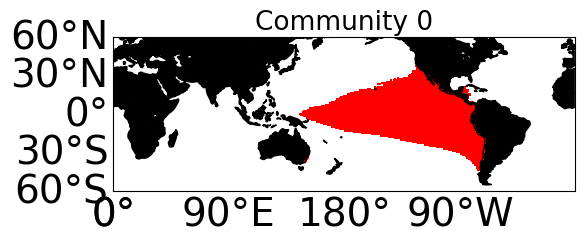

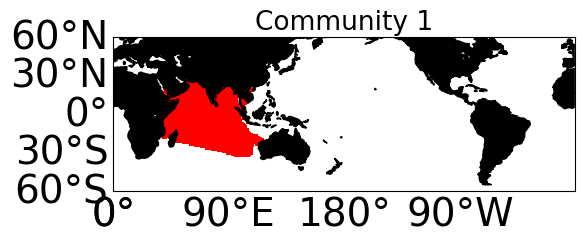

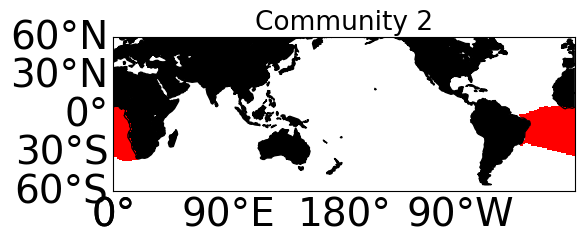

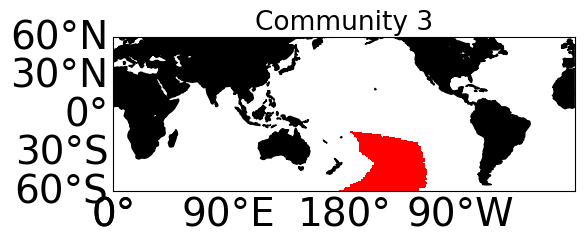

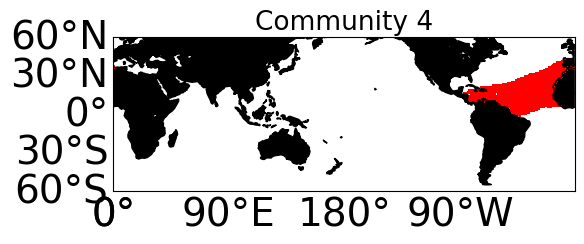

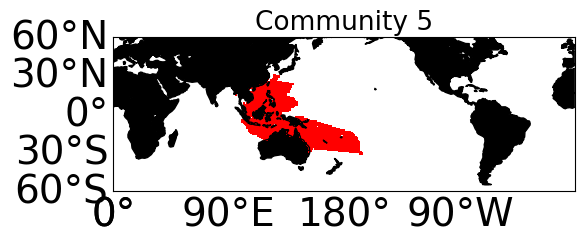

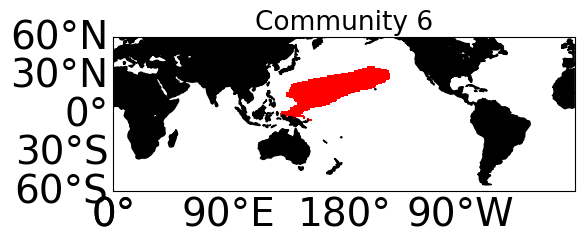

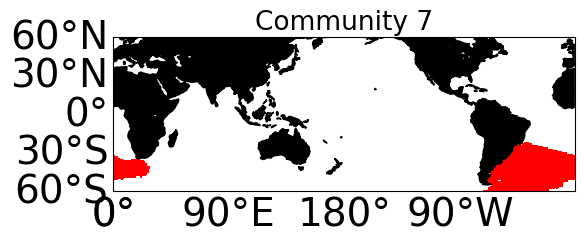

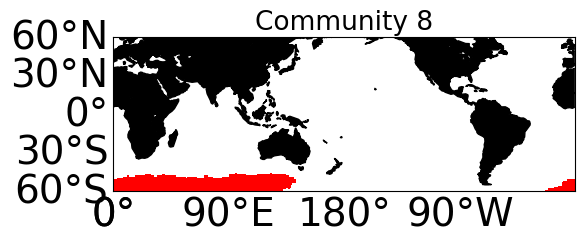

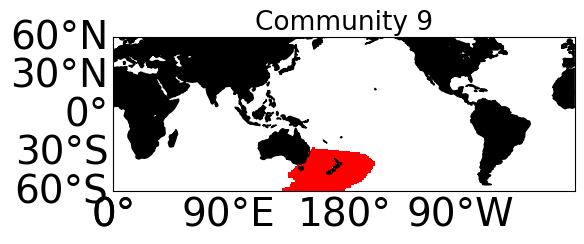

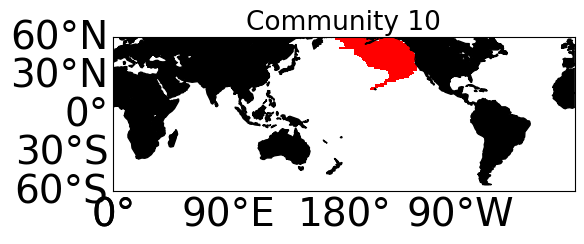

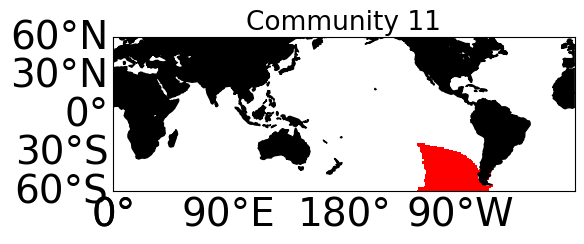

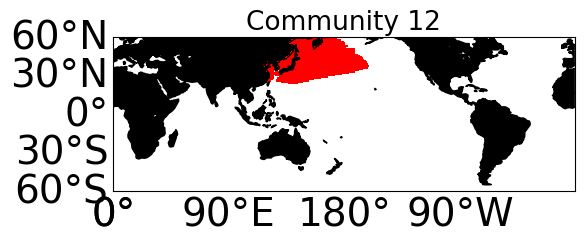

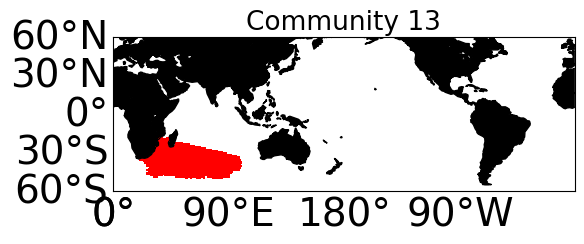

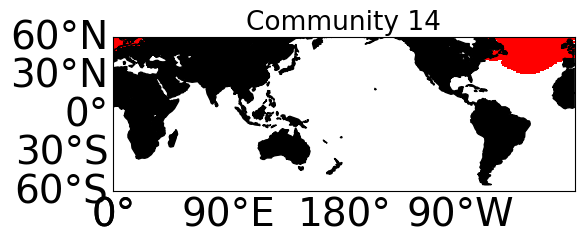

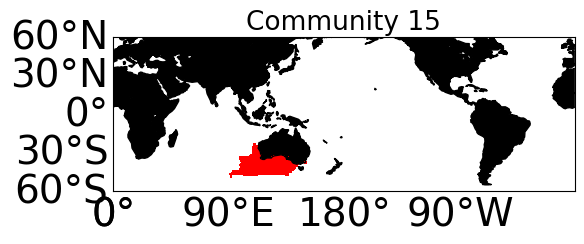

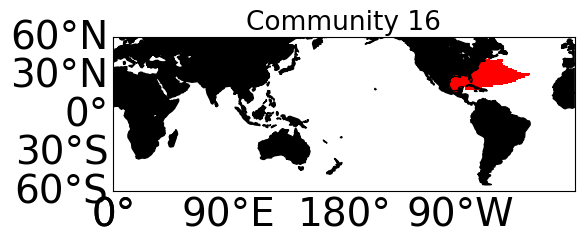

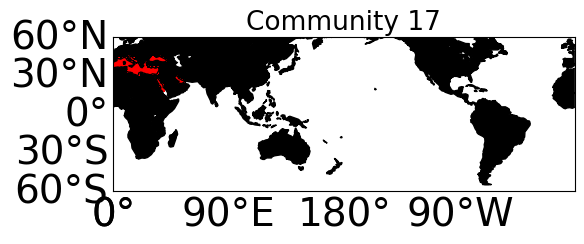

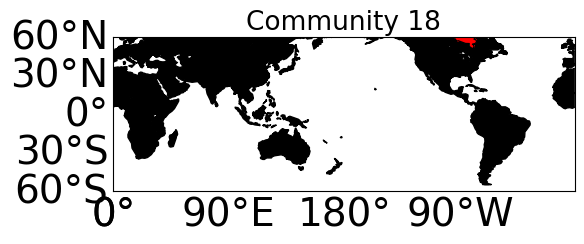

In [110]:
for j in range(len(single_communities)):

    fig = plt.figure(figsize=(15,2))

    #j = 3

    ax = fig.add_subplot(121)  

    map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

    map.drawcoastlines()
    map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
    map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
    map.fillcontinents(color = 'black')


        #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[j],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)

    # Plot domain id
    plt.title('Community '+str(j), fontsize = 19)


    plt.show()

### Consider linkages

In [111]:
# Not filtered
response_matrix = np.load('./results/response_matrix.npy')

s_plus = np.load('./results/analytical_plus_3sigma.npy')
s_minus = np.load('./results/analytical_minus_3sigma.npy')

single_communities = np.load('./results/single_communities_infomap_H.npy')

### Community j = 0 ---> k (Around Niño)

Let's check who is Niño 3.4 leading

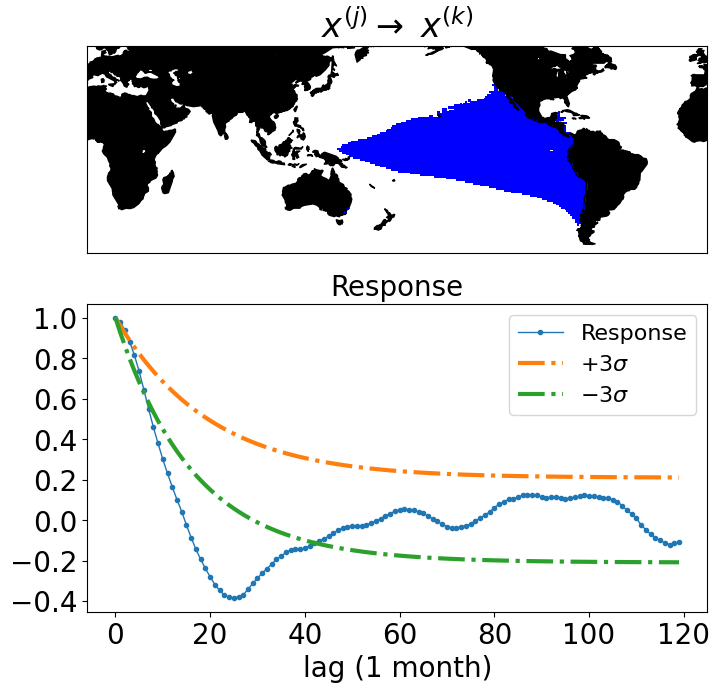

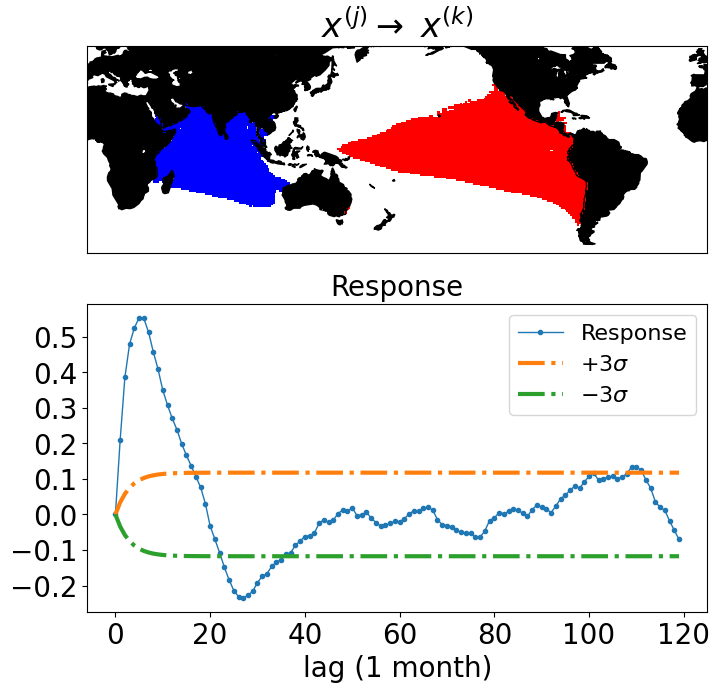

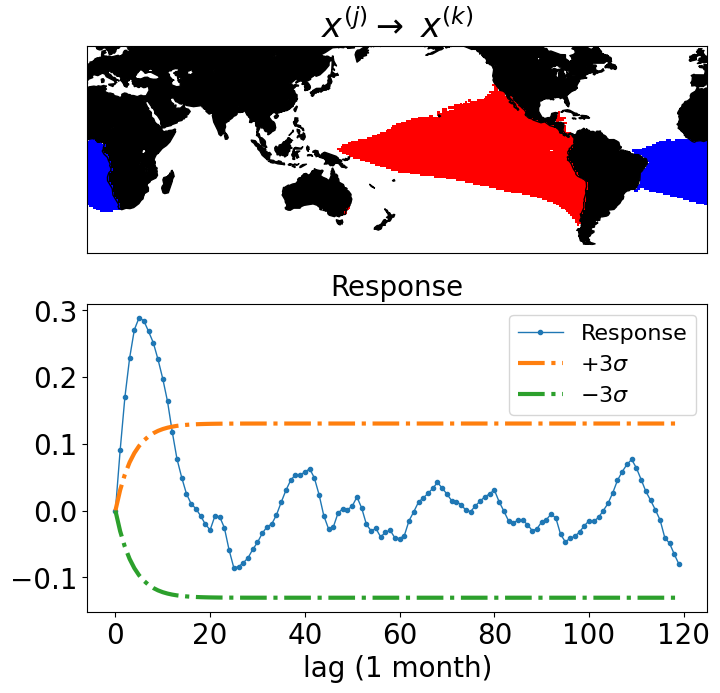

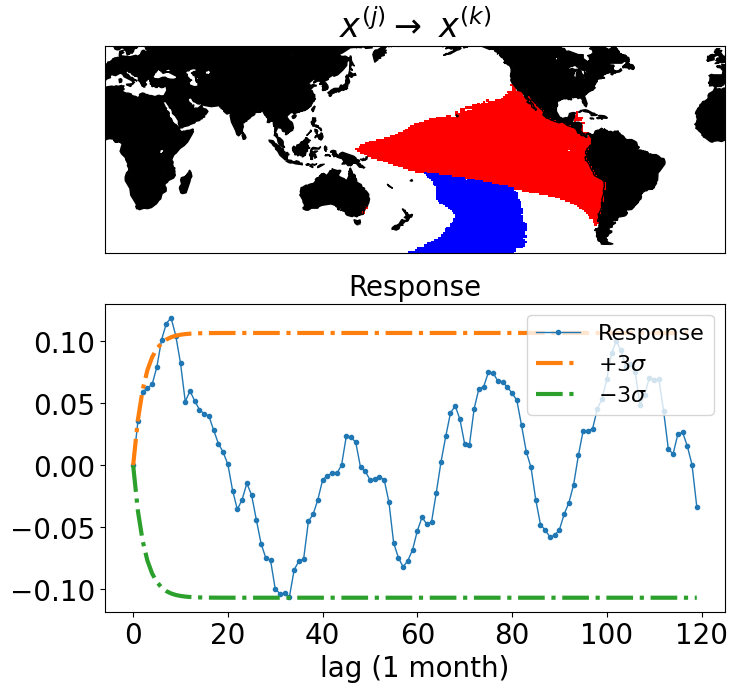

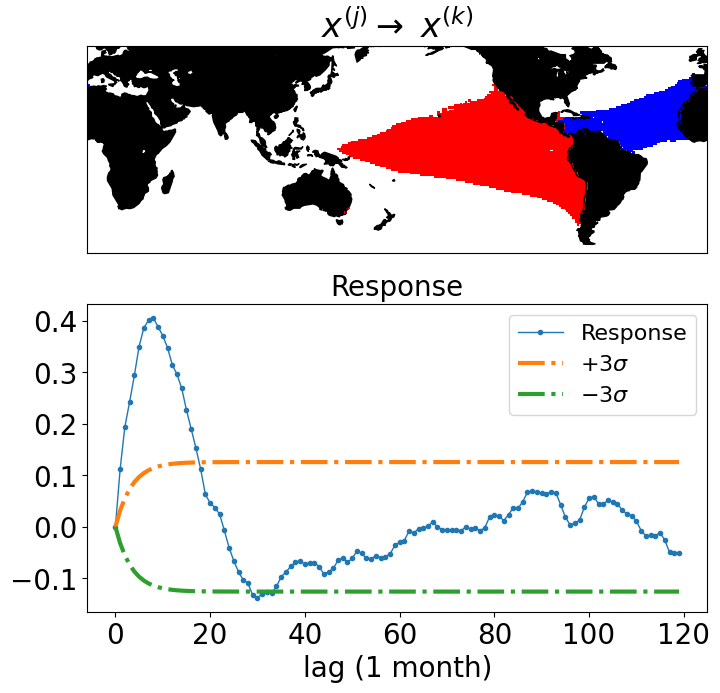

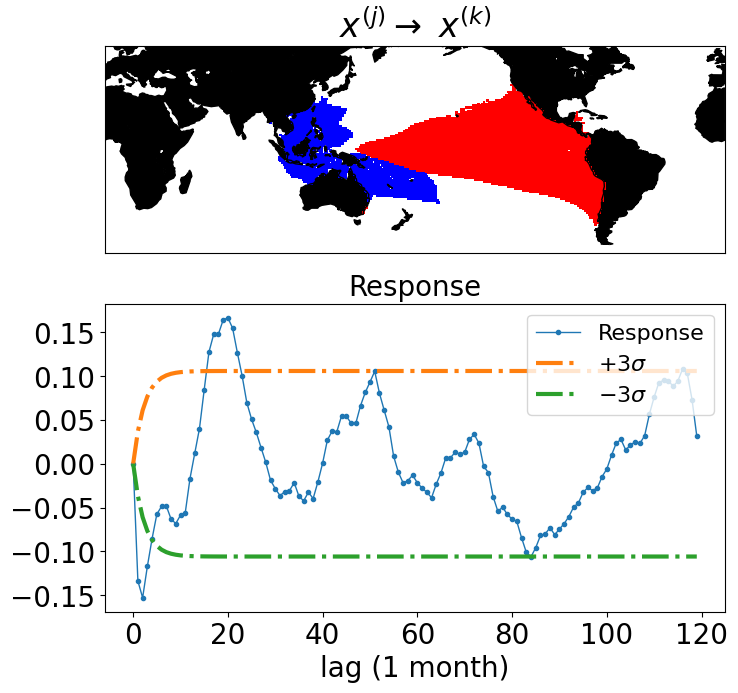

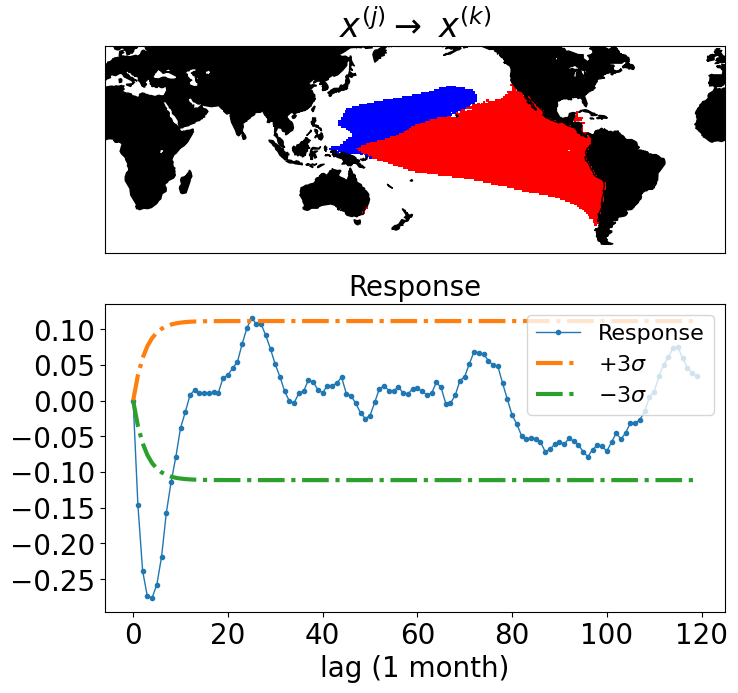

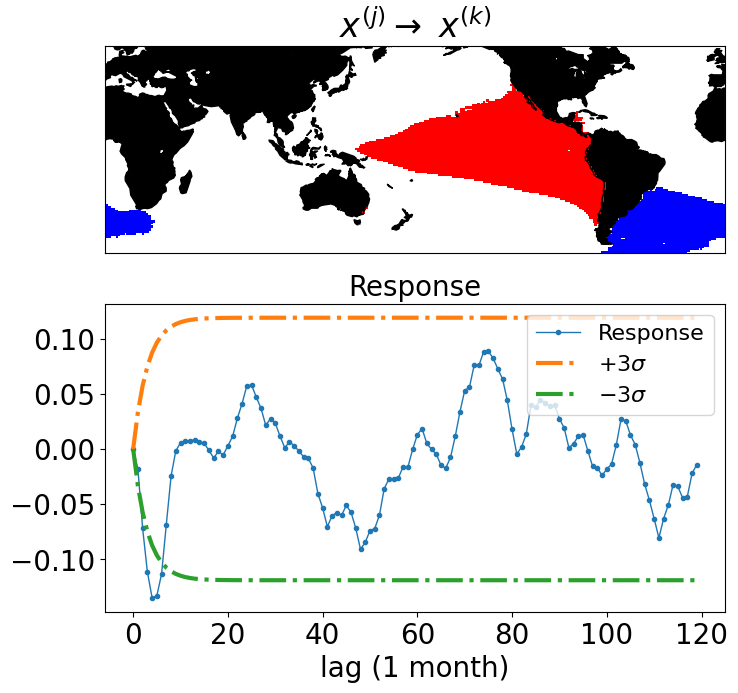

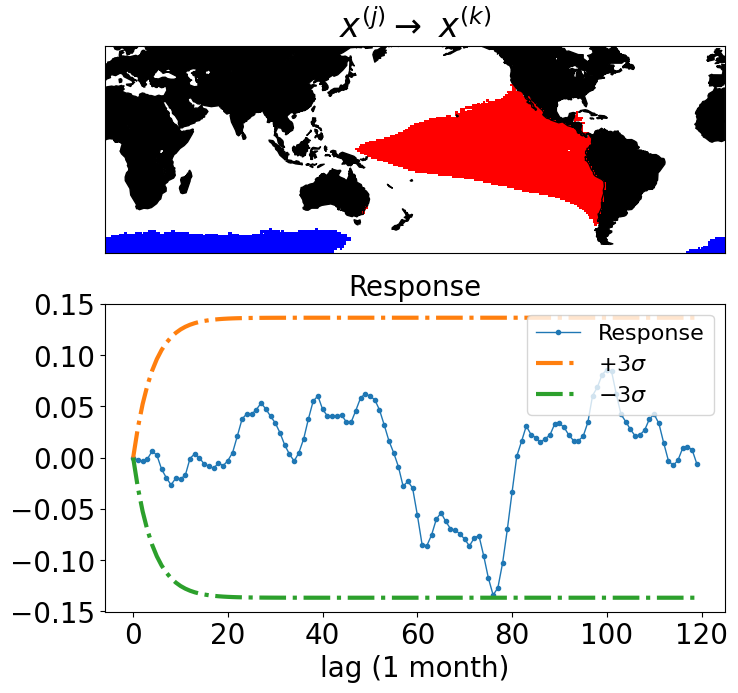

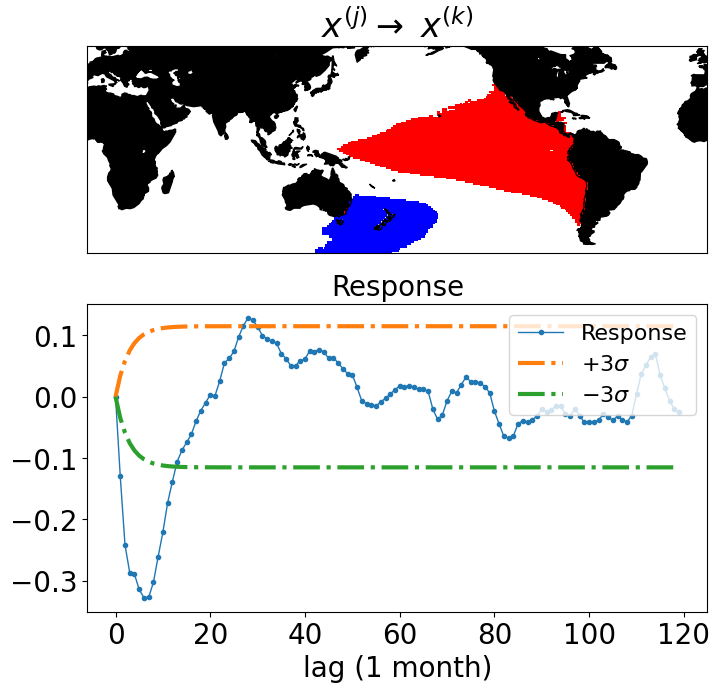

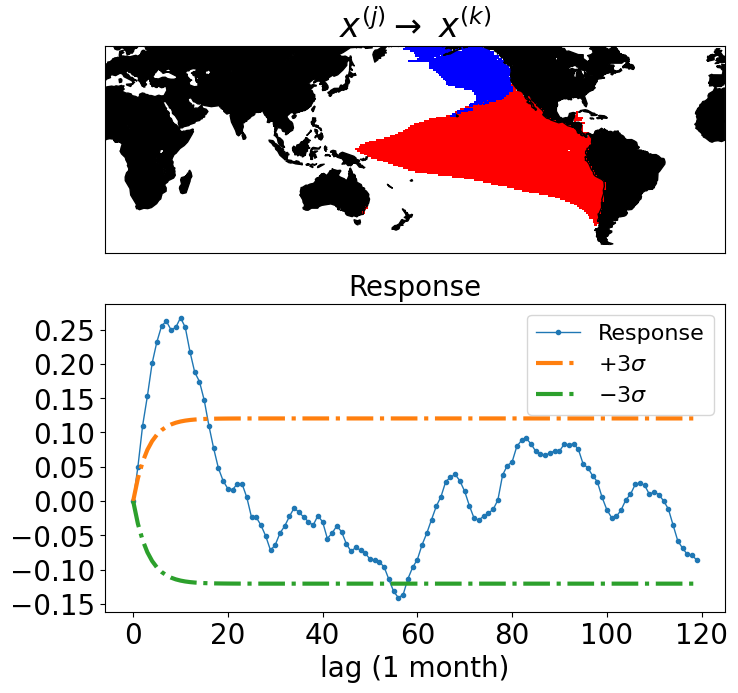

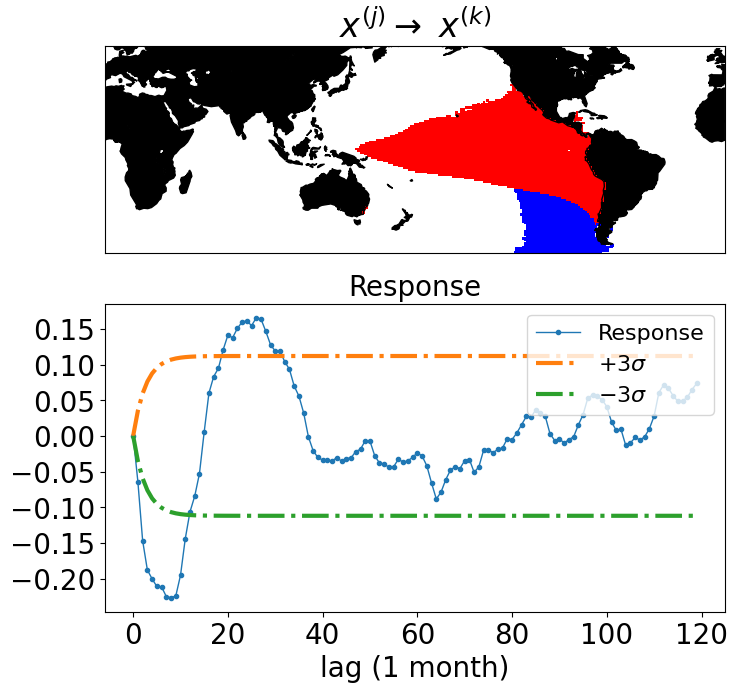

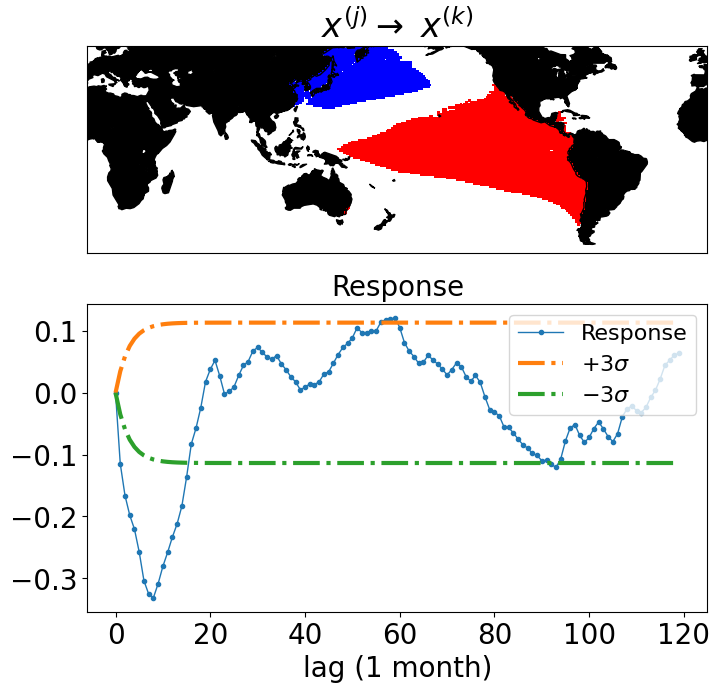

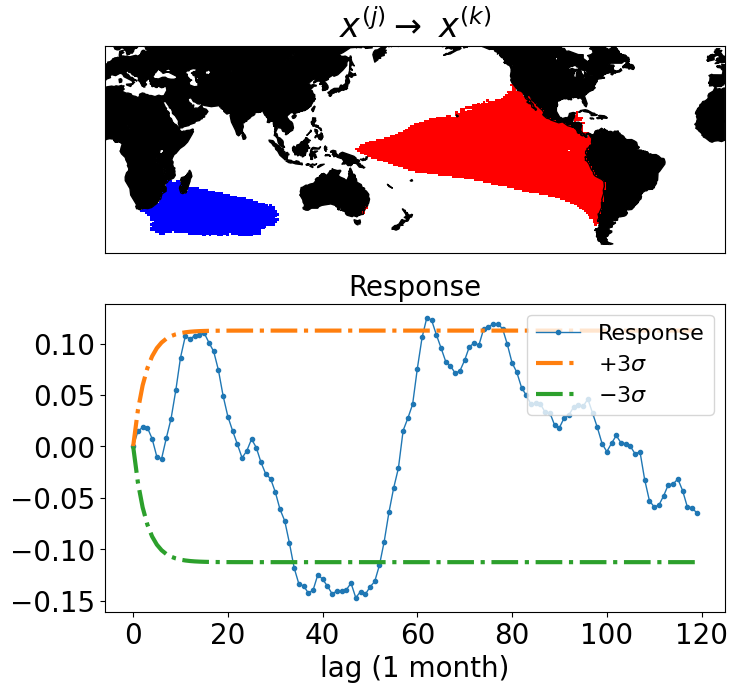

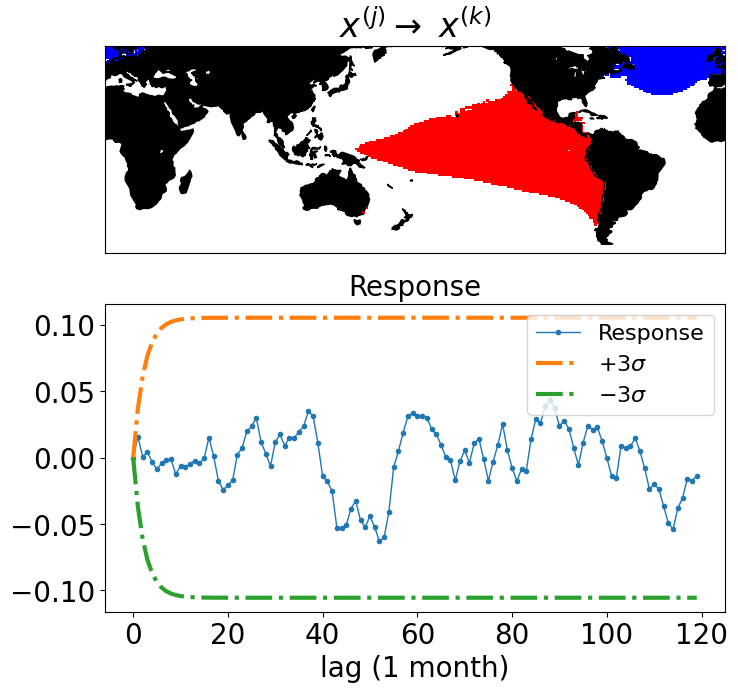

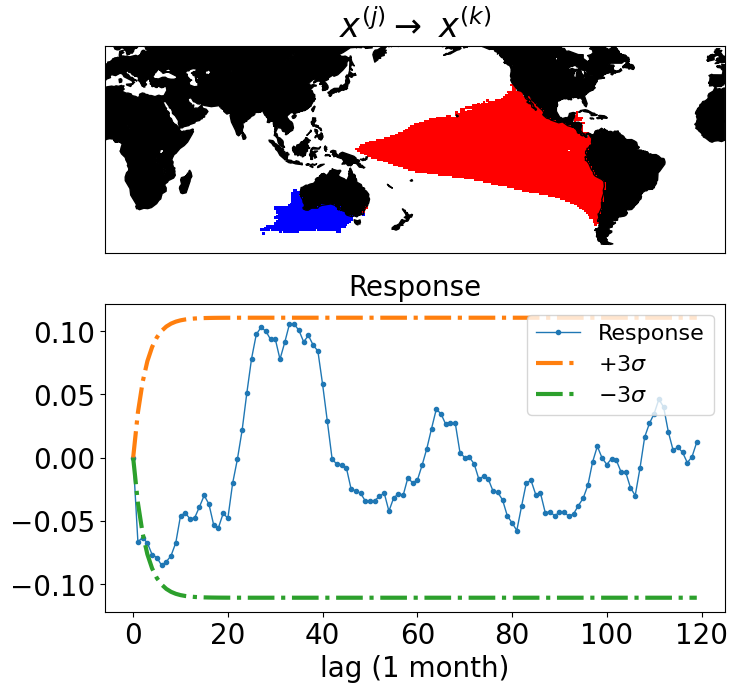

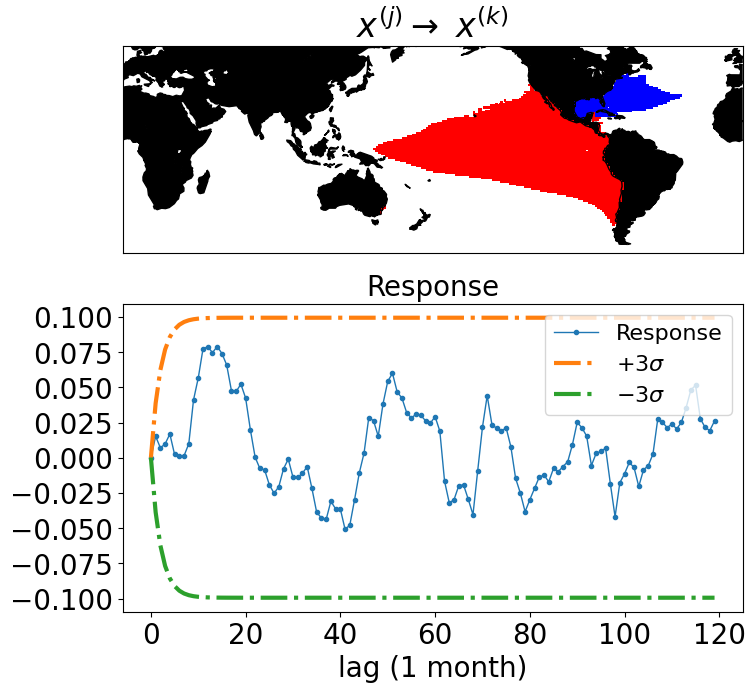

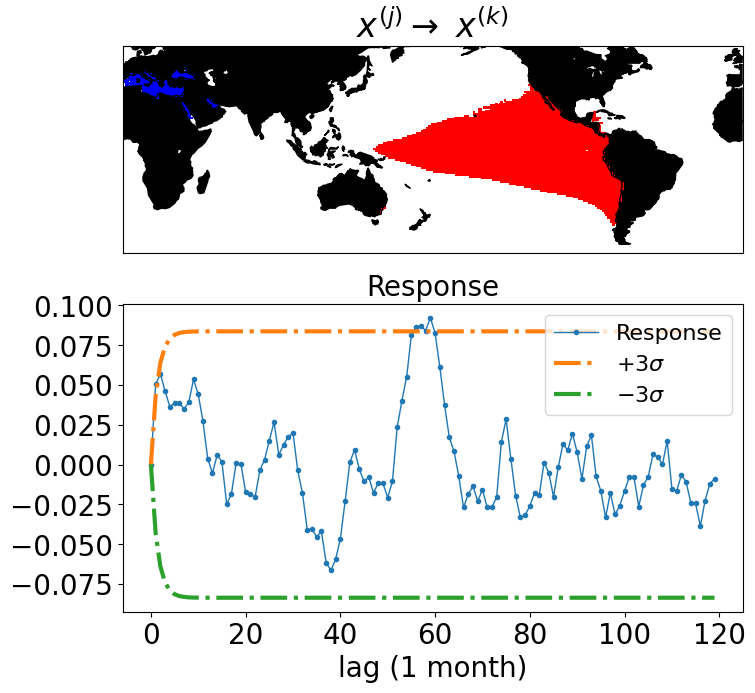

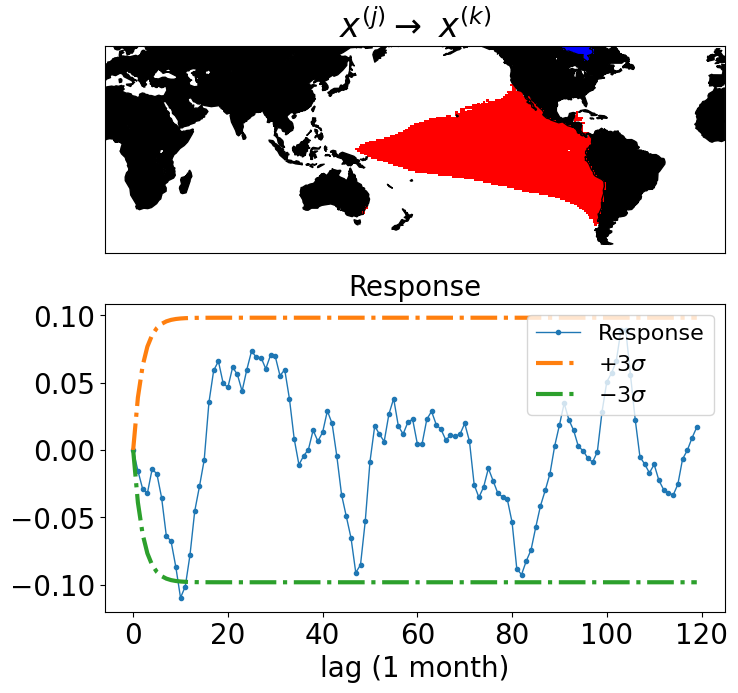

In [116]:
# Let's check the causal link j -> k where 
# k = 12 is the Gulf Of Mexico 
# So we are checking the relationship between every other domain and the GoM

j = 0

# Let's look at all average signals
for k in range(len(single_communities)):
    
    
    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(211)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

    map.drawcoastlines()
    #map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
    #map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
    map.fillcontinents(color = 'black')

    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
    map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('$x^{(j)}$'+ r'$\rightarrow$ '+'$x^{(k)}$', fontsize = 24)

    ax = fig.add_subplot(212)  
    
    plt.plot(response_matrix[:,k,j],'.-',label = 'Response',linewidth = 1,markersize = 6)
    plt.plot(s_plus[:,k,j],'-.',linewidth = 3,label='$+ 3 \sigma$')
    plt.plot(s_minus[:,k,j],'-.',linewidth = 3,label='$- 3 \sigma$')
    #plt.plot(null_response_99p9_percentile[:,k,j],'-.',label = '$q = 1 - 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_0p1_percentile[:,k,j],'-.',label = '$q = 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_99_percentile[:,k,j],'-.',label = '99th percentile',color = 'tab:red',linewidth = 3)
    #plt.plot(null_response_1_percentile[:,k,j],'-.',label = '1st percentile',color = 'tab:red',linewidth = 3)

    plt.legend(loc = 'upper right',fontsize = 16)

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    #ax.set_xticks([0,5,10,15,20])
    #ax.set_xticklabels(['0','5','10','15','20'])

    plt.xlabel('lag (1 month)',fontsize = 20)
    plt.title('Response',fontsize = 20)

    
    plt.subplots_adjust(wspace=0.15, hspace=0)
    
    
    plt.show()
    
    #fig.savefig('./figures/Infomap/q0p95/no_heuristics/ElNino_connections/ElNino_Linkages_'+str(k)+'.eps',bbox_inches='tight') # bbox_inches='tight'

## Paper plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


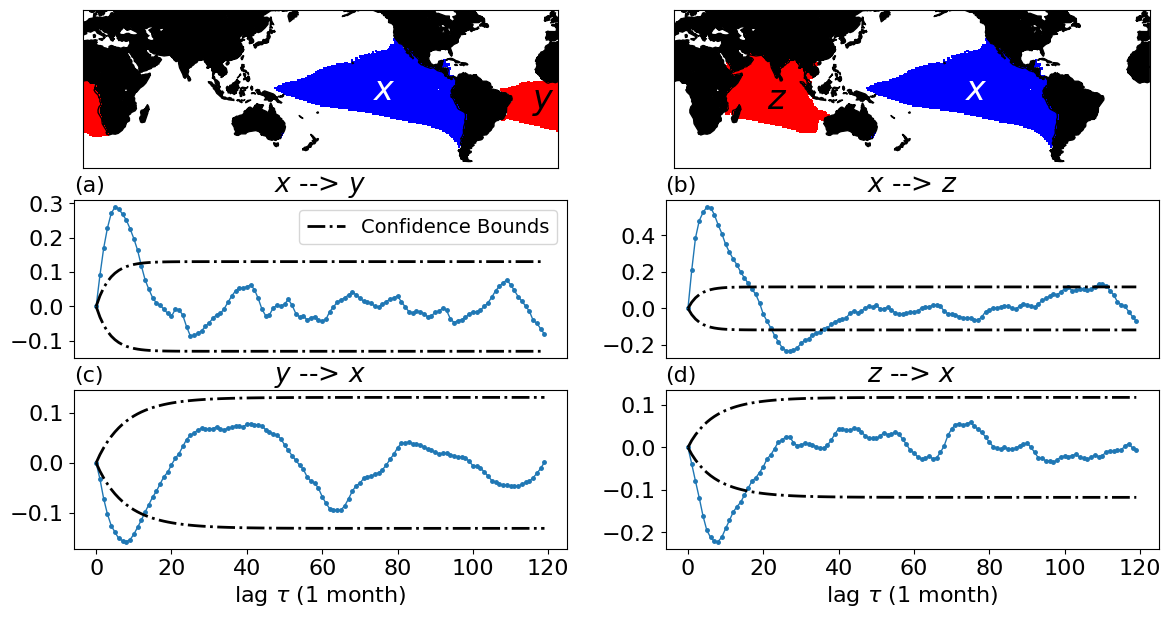

In [118]:
fig = plt.figure(figsize=(14,7))

ax = plt.subplot(321)

j = 2
k = 0

map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
#map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
#map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))

plt.text(220,-8,'$x$',fontsize=24,color = 'w')
plt.text(340,-15,'$y$',fontsize=24,c = 'k')

plt.title('', loc = 'left', fontsize=16)

ax = plt.subplot(322)

j = 1
k = 0

map = Basemap(projection='cyl',
            llcrnrlat=-60,urcrnrlat=60,\
              llcrnrlon=0,urcrnrlon=360)

map.drawcoastlines()
#map.drawparallels(np.arange(-60.,75,30),  labels=[1,0,0,0], fontsize = 28,linewidth=0.001)
#map.drawmeridians(np.arange(0.,360.,90.), labels=[0,0,0,1], fontsize = 28,linewidth=0.001)
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))

plt.text(220,-8,'$x$',fontsize=24,color = 'w')
plt.text(70,-15,'$z$',fontsize=24,c = 'k')

plt.title('', loc = 'left', fontsize=16)

ax = plt.subplot(323)

j = 0
k = 2

plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)
# Analytical
plt.plot(s_plus[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(s_minus[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

plt.legend(fontsize = 14)
plt.xticks([])
plt.yticks(fontsize = 16)
#ax.set_xticks([0,5,10,15,20])
#ax.set_xticklabels(['0','5','10','15','20'])

#plt.ylim([-0.25,0.6])

#plt.xlabel('lag ' + r'$\tau$',fontsize = 20)
#plt.ylim([-0.2,0.6])
        
plt.title('$x$' + ' --> ' + '$y$', c = 'k', fontsize=19)
plt.title('(a)', loc = 'left', fontsize=16)

ax = plt.subplot(324)

j = 0
k = 1

plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)
# Analytical
plt.plot(s_plus[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(s_minus[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

#plt.legend(fontsize = 14)
plt.xticks([])
plt.yticks(fontsize = 16)
#ax.set_xticks([0,5,10,15,20])
#ax.set_xticklabels(['0','5','10','15','20'])

#plt.ylim([-0.25,0.6])

#plt.xlabel('lag ' + r'$\tau$',fontsize = 20)
        
plt.title('$x$' + ' --> ' + '$z$', c = 'k', fontsize=19)
plt.title('(b)', loc = 'left', fontsize=16)


j = 2
k = 0

ax = plt.subplot(325)
plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)

# Analytical
plt.plot(s_plus[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(s_minus[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

#plt.legend(fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylim([-0.25,0.6])

plt.xlabel('lag ' + r'$\tau$' + ' (1 month)',fontsize = 16)
        
plt.title('$y$' + ' --> ' + '$x$', fontsize=19)
plt.title('(c)', loc = 'left', fontsize=16)

j = 1
k = 0

ax = plt.subplot(326)
plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)

# Analytical
plt.plot(s_plus[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(s_minus[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

#plt.legend(fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylim([-0.25,0.6])

plt.xlabel('lag ' + r'$\tau$' + ' (1 month)',fontsize = 16)
        
plt.title('$z$' + ' --> ' + '$x$', fontsize=19)
plt.title('(d)', loc = 'left', fontsize=16)

fig.savefig('./figures/ENSO_AtlanticNino_IO.eps',bbox_inches='tight') 